In [1]:
from models.utils import set_global_seed, CIFAR10_CLASSES, FashionMNIST_CLASSES
set_global_seed(42)
from torchvision import transforms
from torchvision.datasets import FashionMNIST, CIFAR10, CIFAR100
from models.cleaner import NoiseCleaner

# Fashion MNIST

## Fashion MNIST - 20

In [2]:
train_dataset = FashionMNIST(root='data', train=True, download=False)
transform = transforms.Compose([
                                transforms.Grayscale(num_output_channels=3),
                                transforms.ToTensor()])
augmented_transform = transforms.Compose([
                                # transforms.RandomCrop(size=32, padding=4),
                                # transforms.RandomHorizontalFlip(),
                                transforms.Grayscale(num_output_channels=3),
                                transforms.ToTensor()])

noise_cleaner = NoiseCleaner(train_dataset, noise_type='idn', model_save_path="fmnist(20)/resnet18/model_resnet18_fmnist(20)_fold_{}.pth", 
                             inner_folds_num=10, outer_folds_num=10, model='resnet34', train_noise_level=0.2, epochs_num=1000, train_pairs=200000, 
                             val_pairs=20000, embedding_dimension=128, lr=5e-5, optimizer='Adam', patience=12, transform=transform,
                             weight_decay=1e-3, training_batch_size=2048, pre_trained=False, dropout_prob=0.5, contrastive_ratio=1,
                             distance_meter='euclidian', augmented_transform=augmented_transform, trainable=True, pair_validation=False,
                             label_smoothing=0.1, loss='ce', margin=2, freeze_epoch=None, noisy_indices_path='fmnist(20)/resnet18/fold{}_noisy_indices.csv',
                             prediction_path='fmnist(20)/resnet18/fold{}_analysis.csv', mistakes_count=10, relabeling_range=range(6, 11))

Seed: 51


/home/aref/projects/SiameseNoiseDetection/models/predefined.py:89: UserWarning: Attempting to use hipBLASLt on an unsupported architecture! Overriding blas backend to hipblas (Triggered internally at /build/python-pytorch/src/pytorch-rocm/aten/src/ATen/Context.cpp:310.)
  A = x.contiguous().view(1, -1).mm(W[int(y)]).squeeze(0)


noise count: 12496 out of 60000 data


In [3]:
noise_cleaner.clean()

Skipping outer fold 1 with results:
87.23037100949094% accuracy in 1159 data
Loaded 1159 noisy indices from fmnist(20)/resnet18/fold1_noisy_indices.csv
Skipping outer fold 2 with results:
87.60195758564437% accuracy in 1226 data
Loaded 1226 noisy indices from fmnist(20)/resnet18/fold2_noisy_indices.csv
Skipping outer fold 3 with results:
89.60481099656357% accuracy in 1164 data
Loaded 1164 noisy indices from fmnist(20)/resnet18/fold3_noisy_indices.csv
Skipping outer fold 4 with results:
87.42514970059881% accuracy in 1169 data
Loaded 1169 noisy indices from fmnist(20)/resnet18/fold4_noisy_indices.csv
Skipping outer fold 5 with results:
88.8707037643208% accuracy in 1222 data
Loaded 1222 noisy indices from fmnist(20)/resnet18/fold5_noisy_indices.csv
Skipping outer fold 6 with results:
86.18210862619809% accuracy in 1252 data
Loaded 1252 noisy indices from fmnist(20)/resnet18/fold6_noisy_indices.csv
Skipping outer fold 7 with results:
87.52136752136752% accuracy in 1170 data
Loaded 1170 

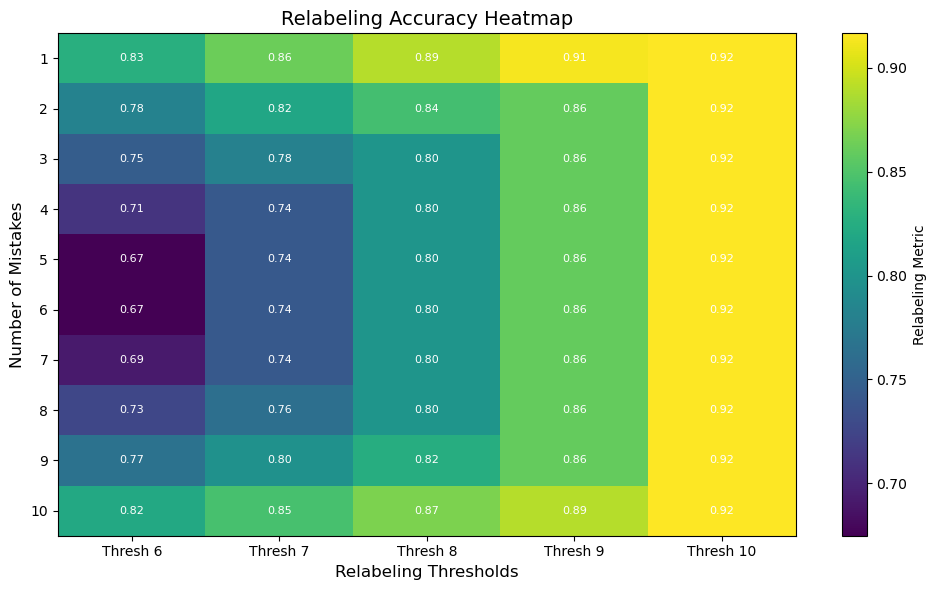

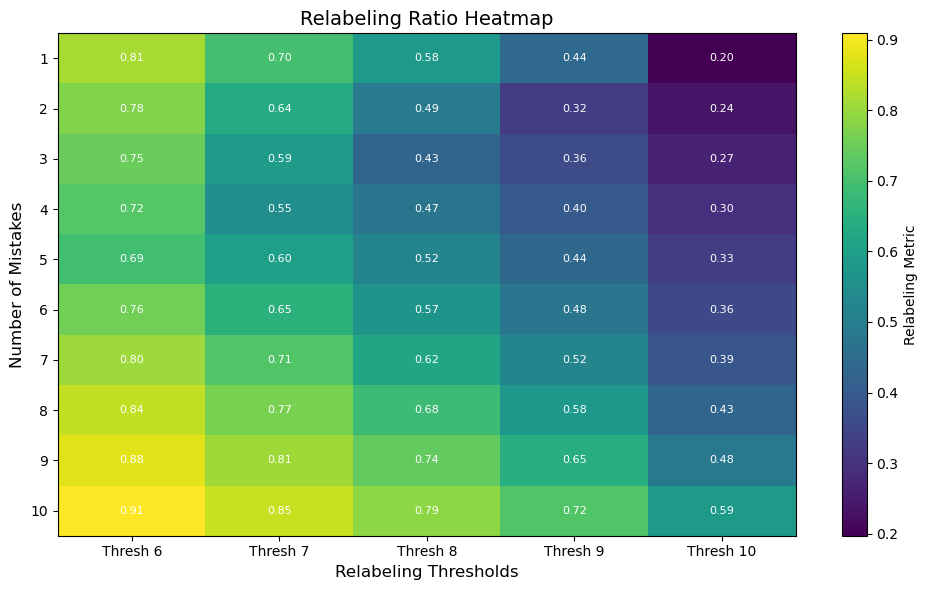

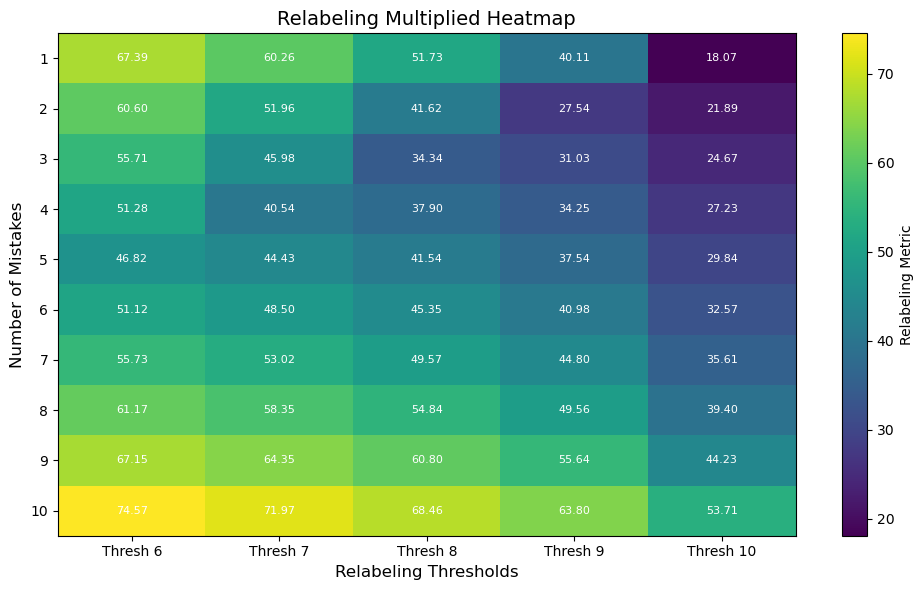

FPR: 0.4839592455372179, TPR: 0.9991997439180538, Mistakes Count: 1
FPR: 0.3542438531492085, TPR: 0.9969590268886044, Mistakes Count: 2
FPR: 0.28553384978107105, TPR: 0.9947983354673495, Mistakes Count: 3
FPR: 0.23488548332771977, TPR: 0.9916773367477593, Mistakes Count: 4
FPR: 0.19246800269450995, TPR: 0.9879961587708067, Mistakes Count: 5
FPR: 0.15632367800606264, TPR: 0.9809539052496798, Mistakes Count: 6
FPR: 0.12352643987874705, TPR: 0.9713508322663252, Mistakes Count: 7
FPR: 0.09068710003368137, TPR: 0.9576664532650448, Mistakes Count: 8
FPR: 0.06161586392724823, TPR: 0.9258162612035852, Mistakes Count: 9
FPR: 0.032313068373189625, TPR: 0.8325064020486556, Mistakes Count: 10


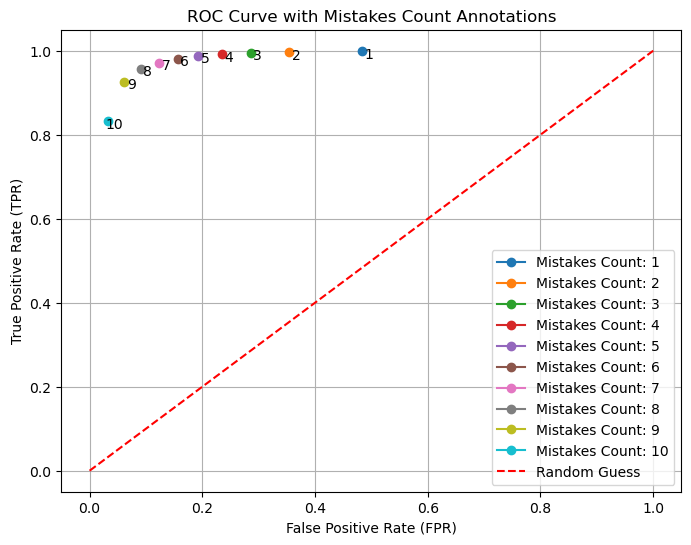

Area Under the Curve (AUC): 0.44259692572825726


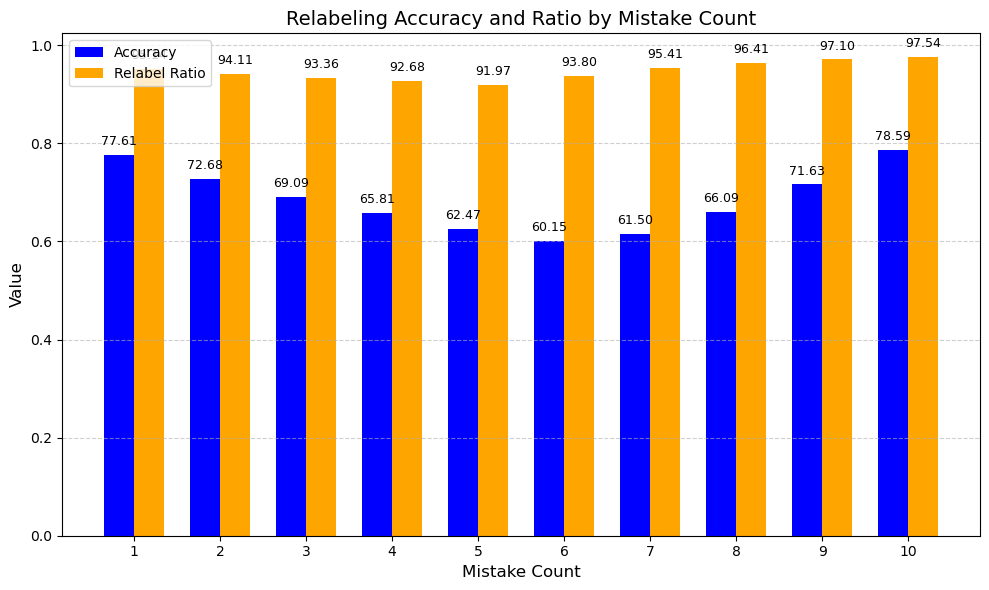

In [4]:
noise_cleaner.analyze()

              precision    recall  f1-score   support

       Clean     0.9796    0.9384    0.9586     47504
       Noisy     0.7981    0.9258    0.8572     12496

    accuracy                         0.9358     60000
   macro avg     0.8889    0.9321    0.9079     60000
weighted avg     0.9418    0.9358    0.9375     60000



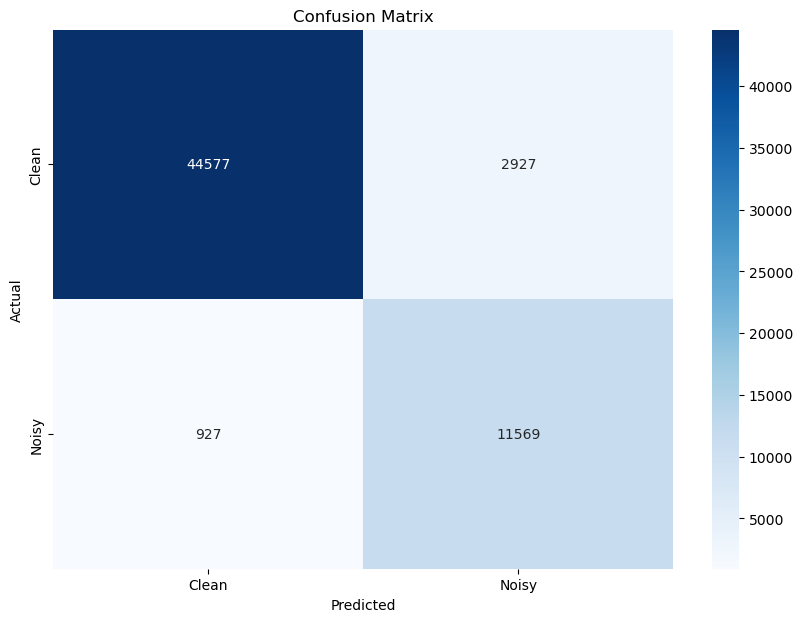

In [8]:
noise_cleaner.report(mistakes_count=9)

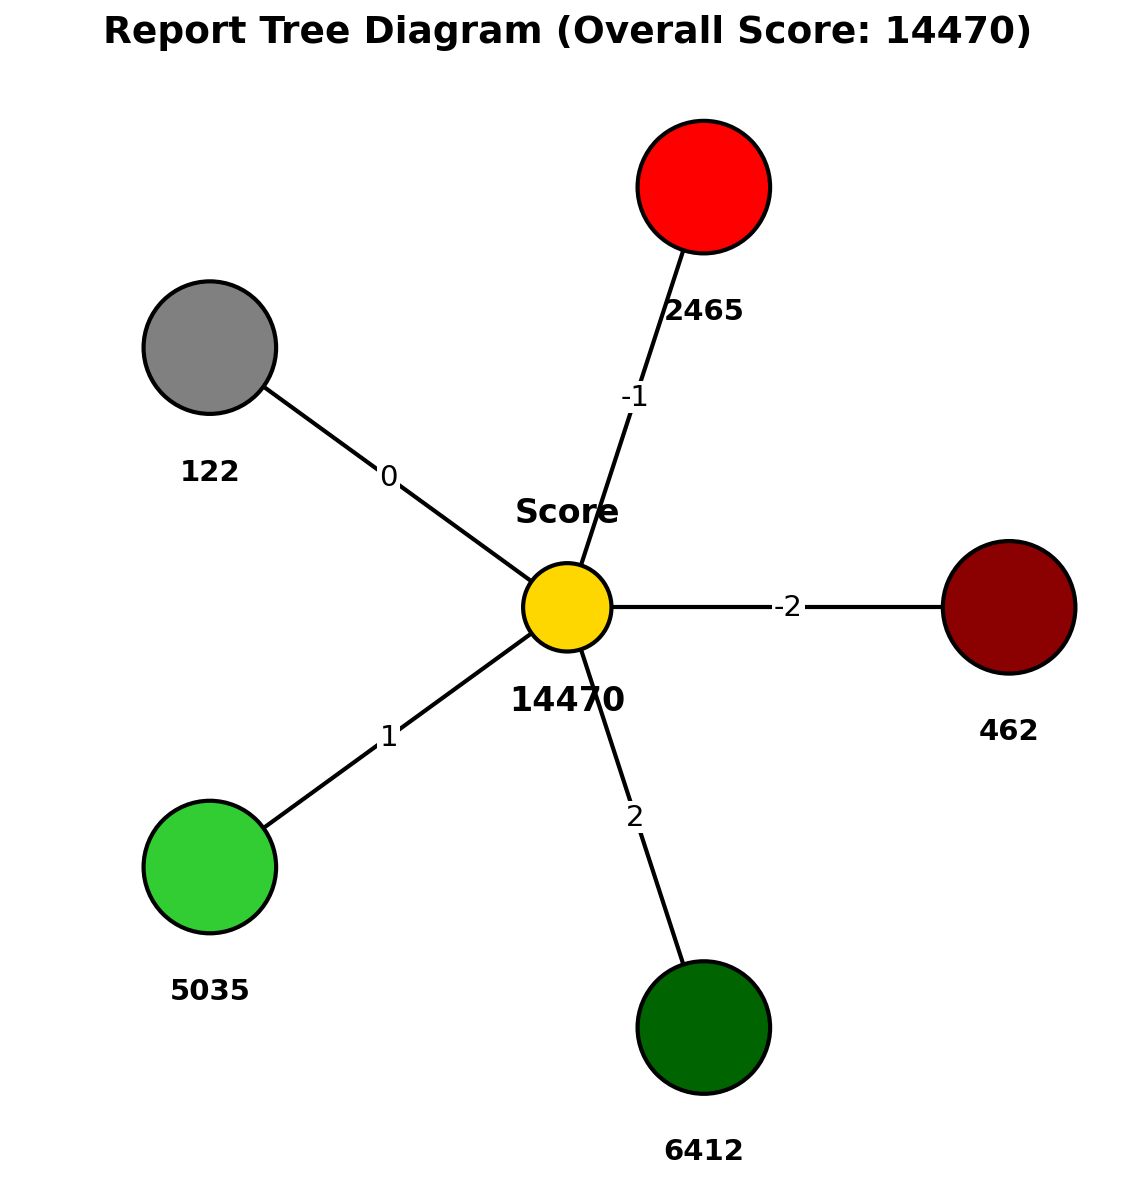

(14470, {'-2': 462, '-1': 2465, '0': 122, '1': 5035, '2': 6412})

In [19]:
noise_cleaner.calculate_relabeling_score(mistakes_count=9, relabel_threshold=10)

              precision    recall  f1-score   support

       Clean     0.9796    0.9384    0.9586     47504
       Noisy     0.7981    0.9258    0.8572     12496

    accuracy                         0.9358     60000
   macro avg     0.8889    0.9321    0.9079     60000
weighted avg     0.9418    0.9358    0.9375     60000



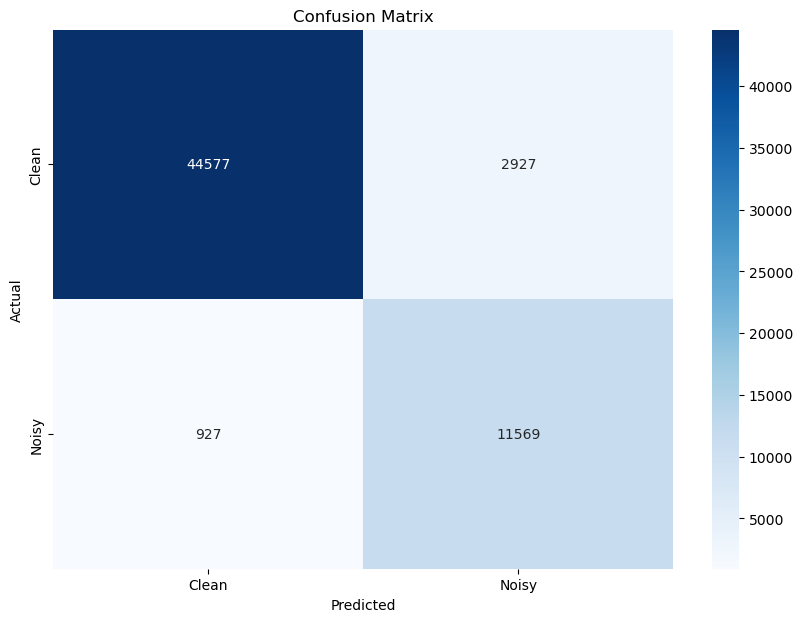

              precision    recall  f1-score   support

       Clean     0.8579    0.9481    0.9007     47504
       Noisy     0.6713    0.4029    0.5036     12496

    accuracy                         0.8346     60000
   macro avg     0.7646    0.6755    0.7022     60000
weighted avg     0.8190    0.8346    0.8180     60000



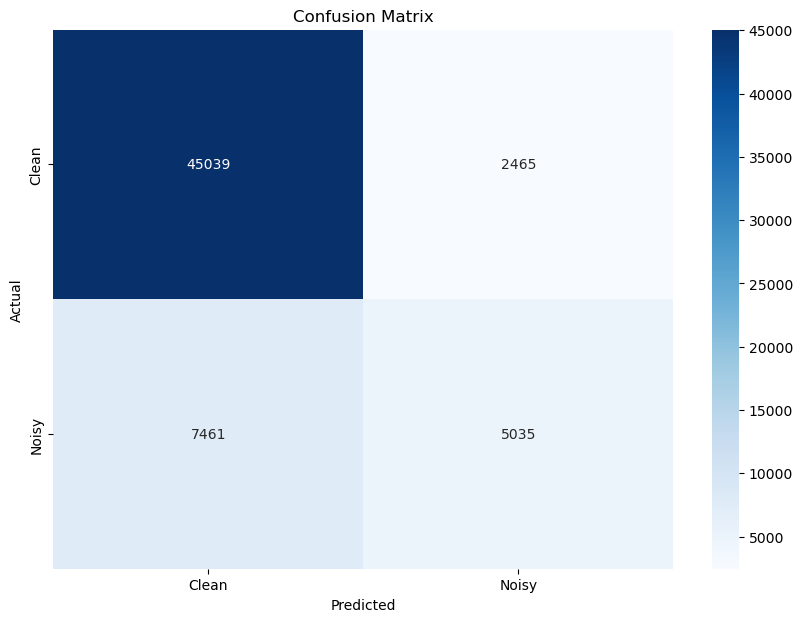

7500 removed from dataset and 6996 relabled
2.88% noise remained in 52500 data


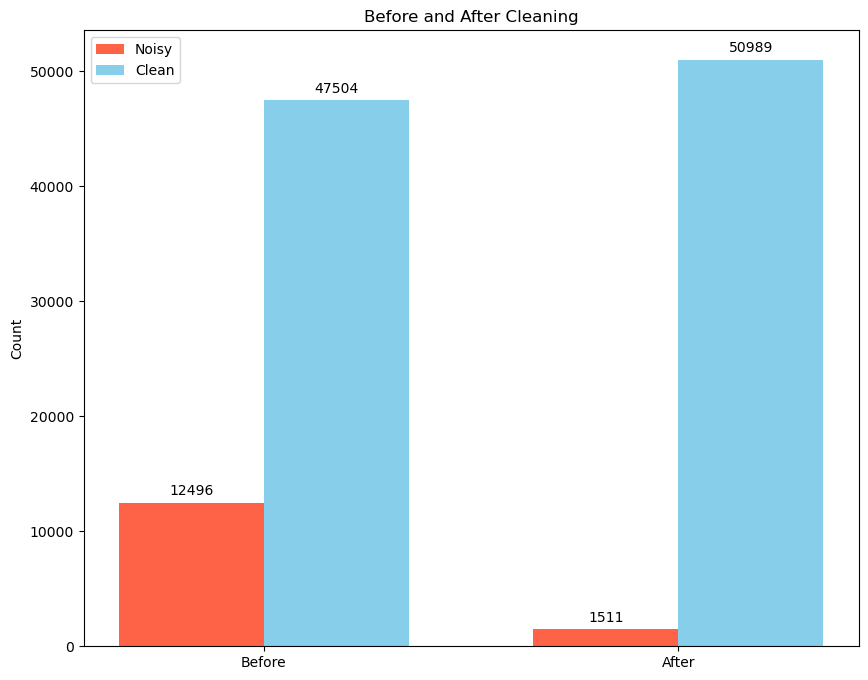

In [20]:
dataset = FashionMNIST(root='data', train=True, download=False)
noise_cleaner.advanced_clean(dataset=dataset, mistakes_count=9, relabel_threshold=10)

## Fashion MNIST - 30

In [2]:
train_dataset = FashionMNIST(root='data', train=True, download=False)
transform = transforms.Compose([
                                transforms.Grayscale(num_output_channels=3),
                                transforms.ToTensor()])
augmented_transform = transforms.Compose([
                                # transforms.RandomCrop(size=32, padding=4),
                                # transforms.RandomHorizontalFlip(),
                                transforms.Grayscale(num_output_channels=3),
                                transforms.ToTensor()])

noise_cleaner = NoiseCleaner(train_dataset, noise_type='idn', model_save_path="fmnist(30)/resnet18/model_resnet18_fmnist(30)_fold_{}.pth", 
                             inner_folds_num=10, outer_folds_num=10, model='resnet34', train_noise_level=0.3, epochs_num=1000, train_pairs=200000, 
                             val_pairs=20000, embedding_dimension=128, lr=5e-5, optimizer='Adam', patience=12, transform=transform,
                             weight_decay=1e-3, training_batch_size=2048, pre_trained=False, dropout_prob=0.5, contrastive_ratio=1,
                             distance_meter='euclidian', augmented_transform=augmented_transform, trainable=True, pair_validation=False,
                             label_smoothing=0.1, loss='ce', margin=2, freeze_epoch=None, noisy_indices_path='fmnist(30)/resnet18/fold{}_noisy_indices.csv',
                             prediction_path='fmnist(30)/resnet18/fold{}_analysis.csv', mistakes_count=10, relabeling_range=range(6, 11))

Seed: 51
noise count: 18223 out of 60000 data


In [3]:
noise_cleaner.clean()

Skipping outer fold 1 with results:
90.24869109947645% accuracy in 1528 data
Loaded 1528 noisy indices from fmnist(30)/resnet18/fold1_noisy_indices.csv
Skipping outer fold 2 with results:
91.06551952349437% accuracy in 1511 data
Loaded 1511 noisy indices from fmnist(30)/resnet18/fold2_noisy_indices.csv
Skipping outer fold 3 with results:
90.87904824851289% accuracy in 1513 data
Loaded 1513 noisy indices from fmnist(30)/resnet18/fold3_noisy_indices.csv
Skipping outer fold 4 with results:
89.93963782696177% accuracy in 1491 data
Loaded 1491 noisy indices from fmnist(30)/resnet18/fold4_noisy_indices.csv
Skipping outer fold 5 with results:
90.3348073278585% accuracy in 1583 data
Loaded 1583 noisy indices from fmnist(30)/resnet18/fold5_noisy_indices.csv
Skipping outer fold 6 with results:
91.4452365521711% accuracy in 1543 data
Loaded 1543 noisy indices from fmnist(30)/resnet18/fold6_noisy_indices.csv
Skipping outer fold 7 with results:
89.14431673052363% accuracy in 1566 data
Loaded 1566 n

              precision    recall  f1-score   support

       Clean     0.9554    0.9308    0.9429     41777
       Noisy     0.8502    0.9003    0.8746     18223

    accuracy                         0.9216     60000
   macro avg     0.9028    0.9156    0.9088     60000
weighted avg     0.9234    0.9216    0.9222     60000



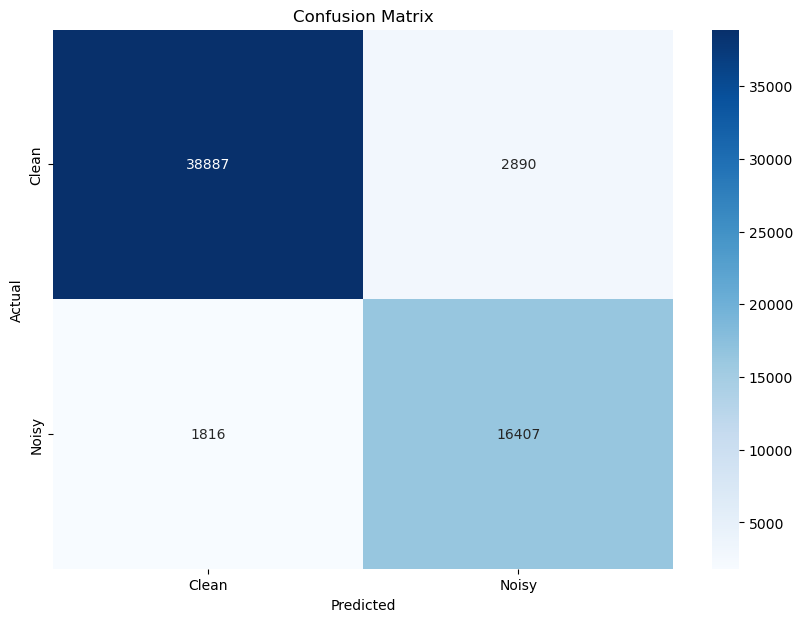

In [12]:
noise_cleaner.report(mistakes_count=9)

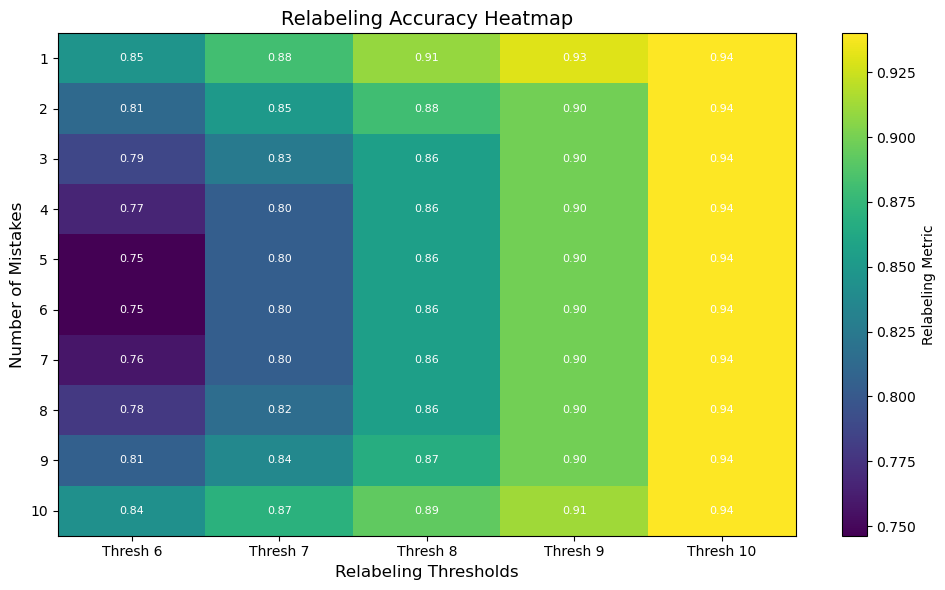

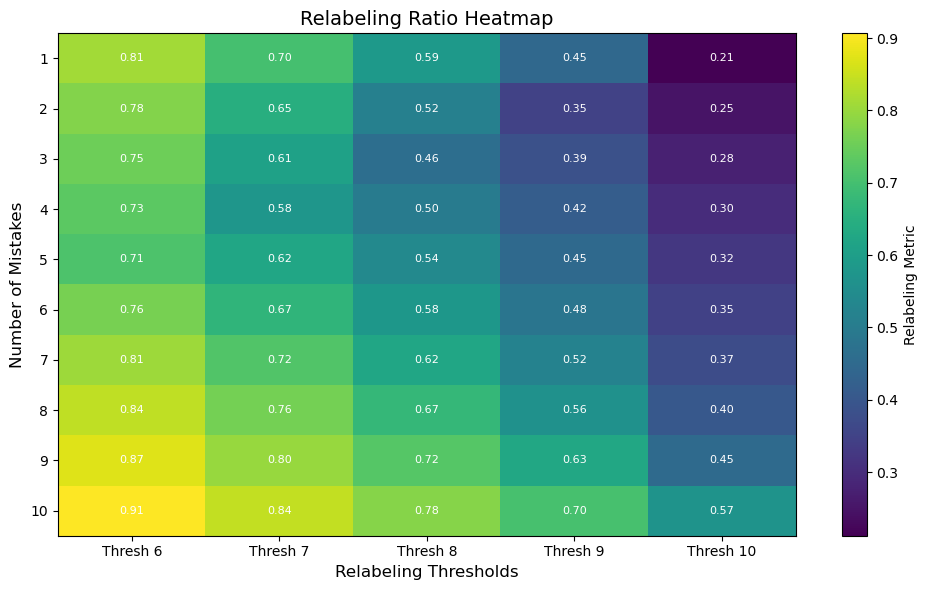

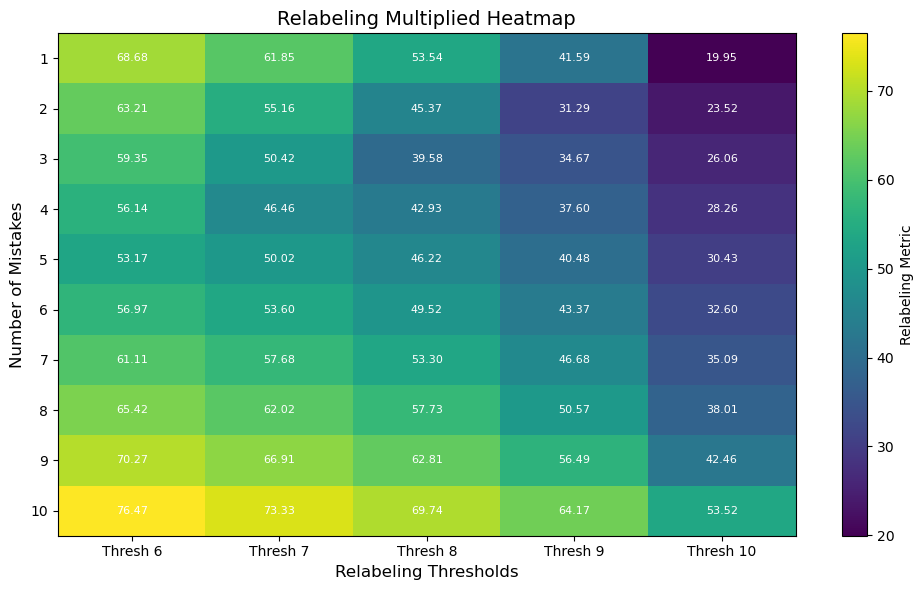

FPR: 0.5471192282835052, TPR: 0.9989024858695056, Mistakes Count: 1
FPR: 0.39928668884793067, TPR: 0.9965428304889425, Mistakes Count: 2
FPR: 0.318787849773799, TPR: 0.9946221807605773, Mistakes Count: 3
FPR: 0.2616990209924121, TPR: 0.9908906327168963, Mistakes Count: 4
FPR: 0.21483112717523997, TPR: 0.9851835592383252, Mistakes Count: 5
FPR: 0.1749766617995548, TPR: 0.9779948416835866, Mistakes Count: 6
FPR: 0.1372764918495823, TPR: 0.9666904461394941, Mistakes Count: 7
FPR: 0.1027598918064964, TPR: 0.9473193217362673, Mistakes Count: 8
FPR: 0.06917681978121933, TPR: 0.9003457169511058, Mistakes Count: 9
FPR: 0.03504320559159346, TPR: 0.7596992811282445, Mistakes Count: 10


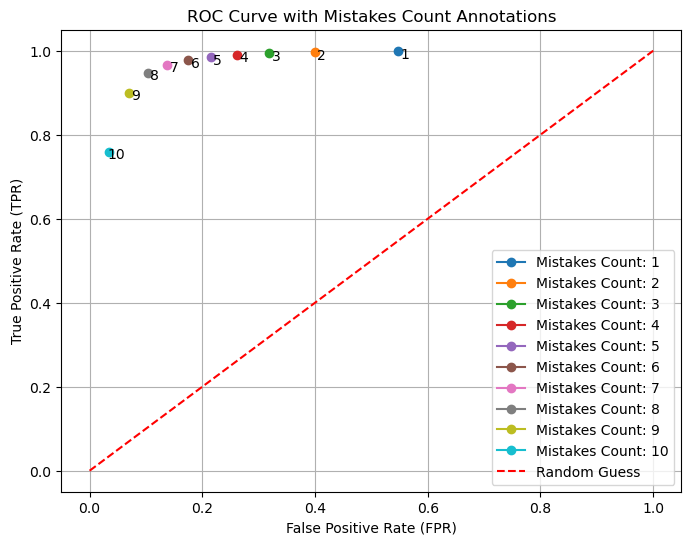

Area Under the Curve (AUC): 0.4987891806774867


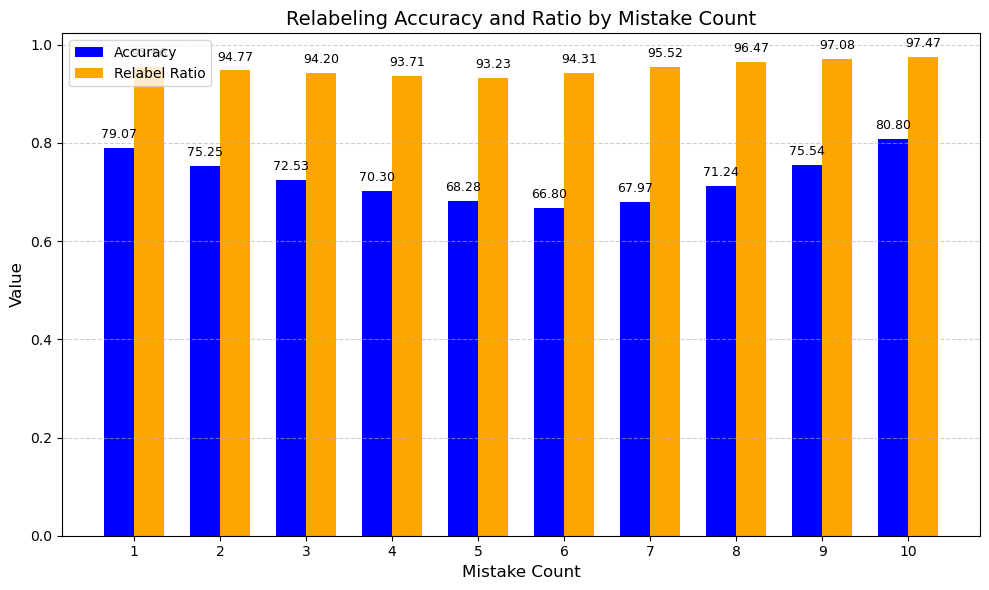

In [4]:
noise_cleaner.analyze()

              precision    recall  f1-score   support

       Clean     0.9554    0.9308    0.9429     41777
       Noisy     0.8502    0.9003    0.8746     18223

    accuracy                         0.9216     60000
   macro avg     0.9028    0.9156    0.9088     60000
weighted avg     0.9234    0.9216    0.9222     60000



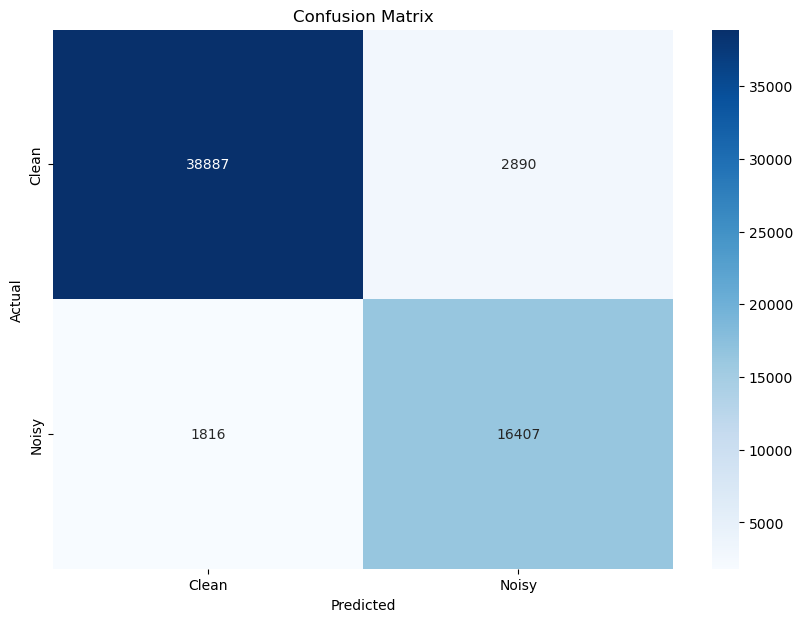

              precision    recall  f1-score   support

       Clean     0.7940    0.9393    0.8606     41777
       Noisy     0.7602    0.4414    0.5585     18223

    accuracy                         0.7881     60000
   macro avg     0.7771    0.6903    0.7095     60000
weighted avg     0.7838    0.7881    0.7688     60000



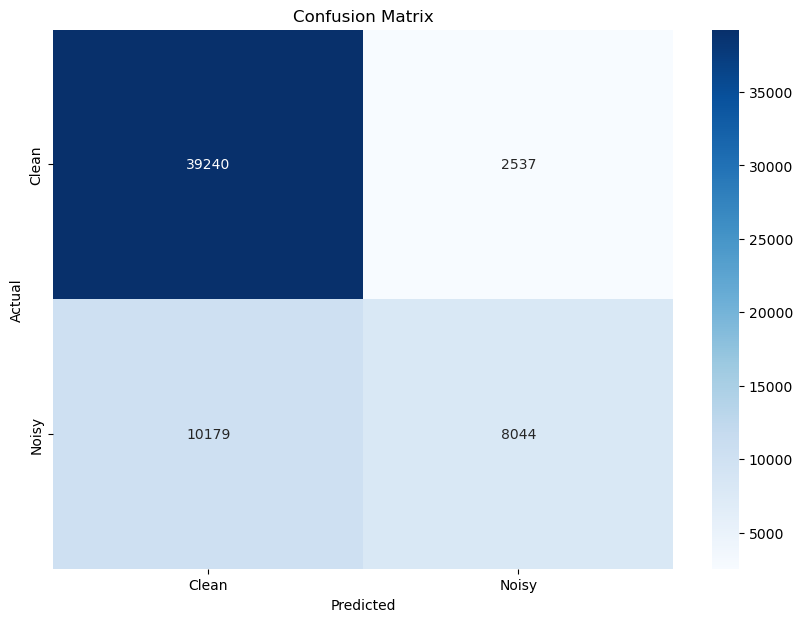

10581 removed from dataset and 8716 relabled
4.73% noise remained in 49419 data


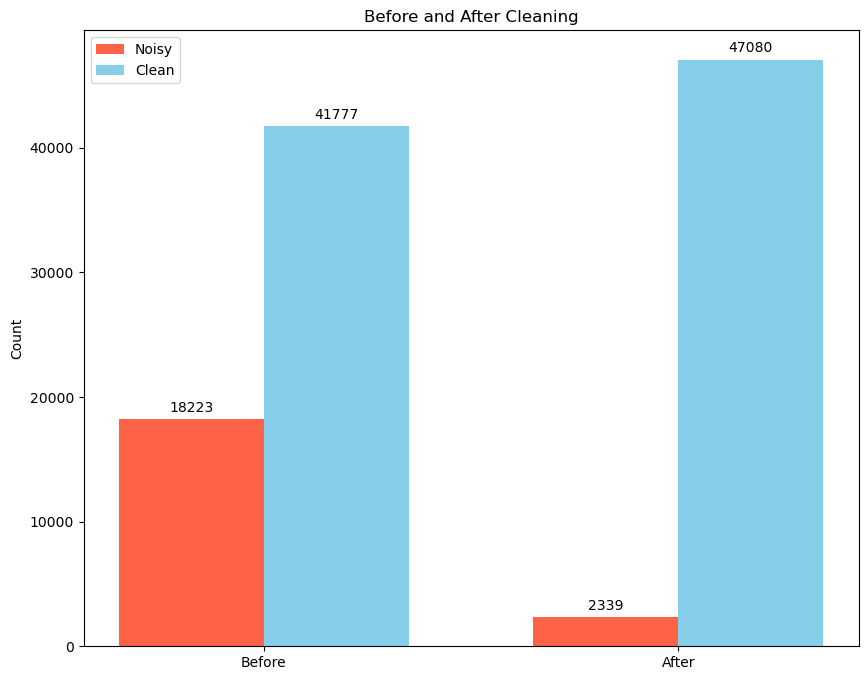

In [15]:
dataset = FashionMNIST(root='./data', train=True)
noise_cleaner.advanced_clean(dataset=dataset, mistakes_count=9, relabel_threshold=10)

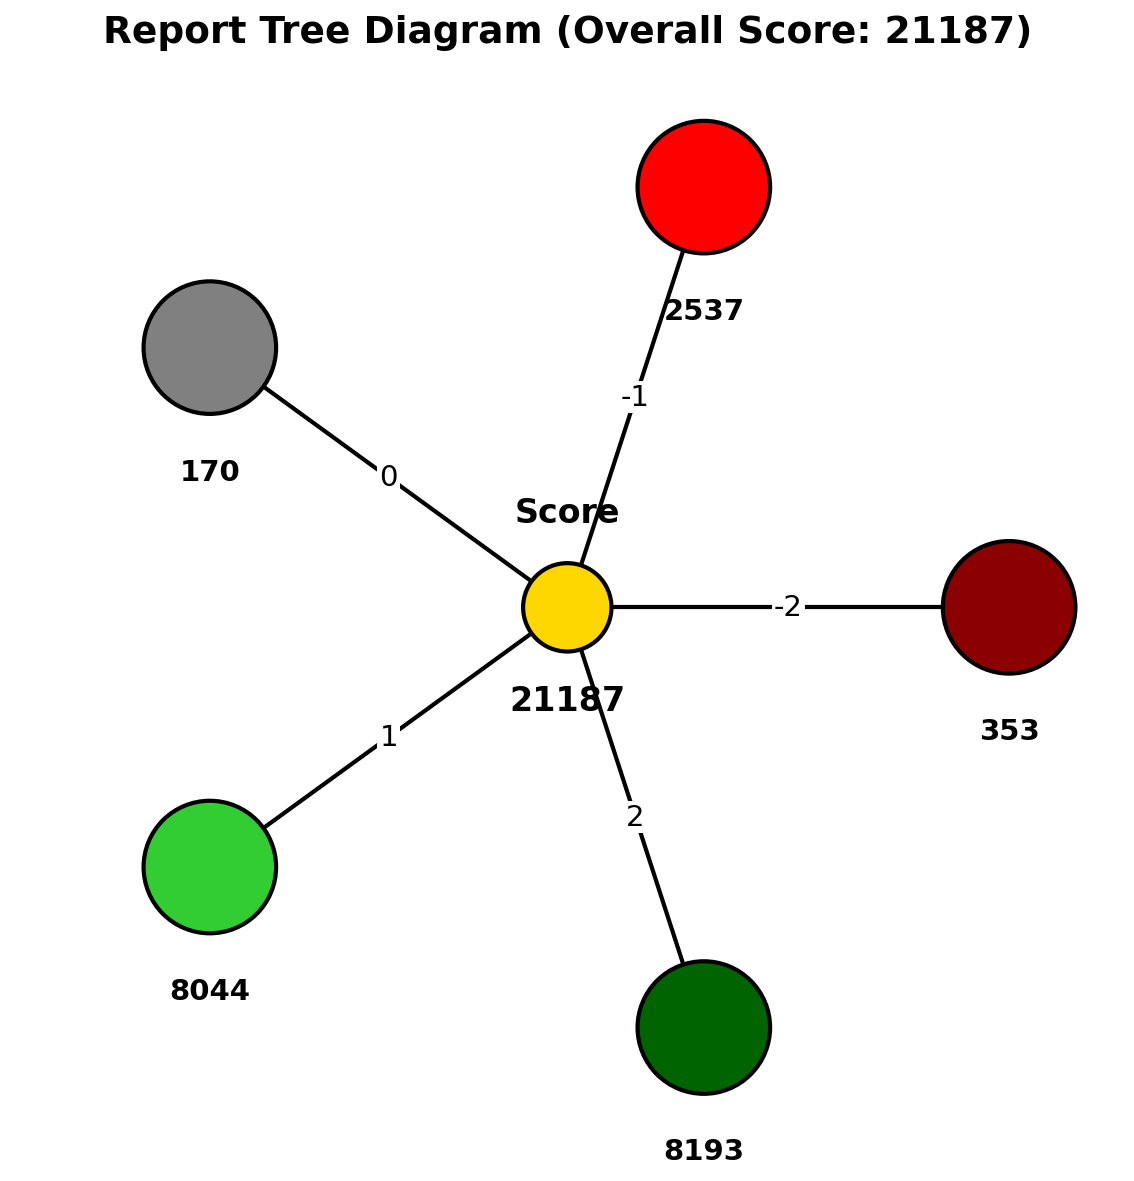

(21187, {'-2': 353, '-1': 2537, '0': 170, '1': 8044, '2': 8193})

In [5]:
noise_cleaner.calculate_relabeling_score(mistakes_count=9, relabel_threshold=10)

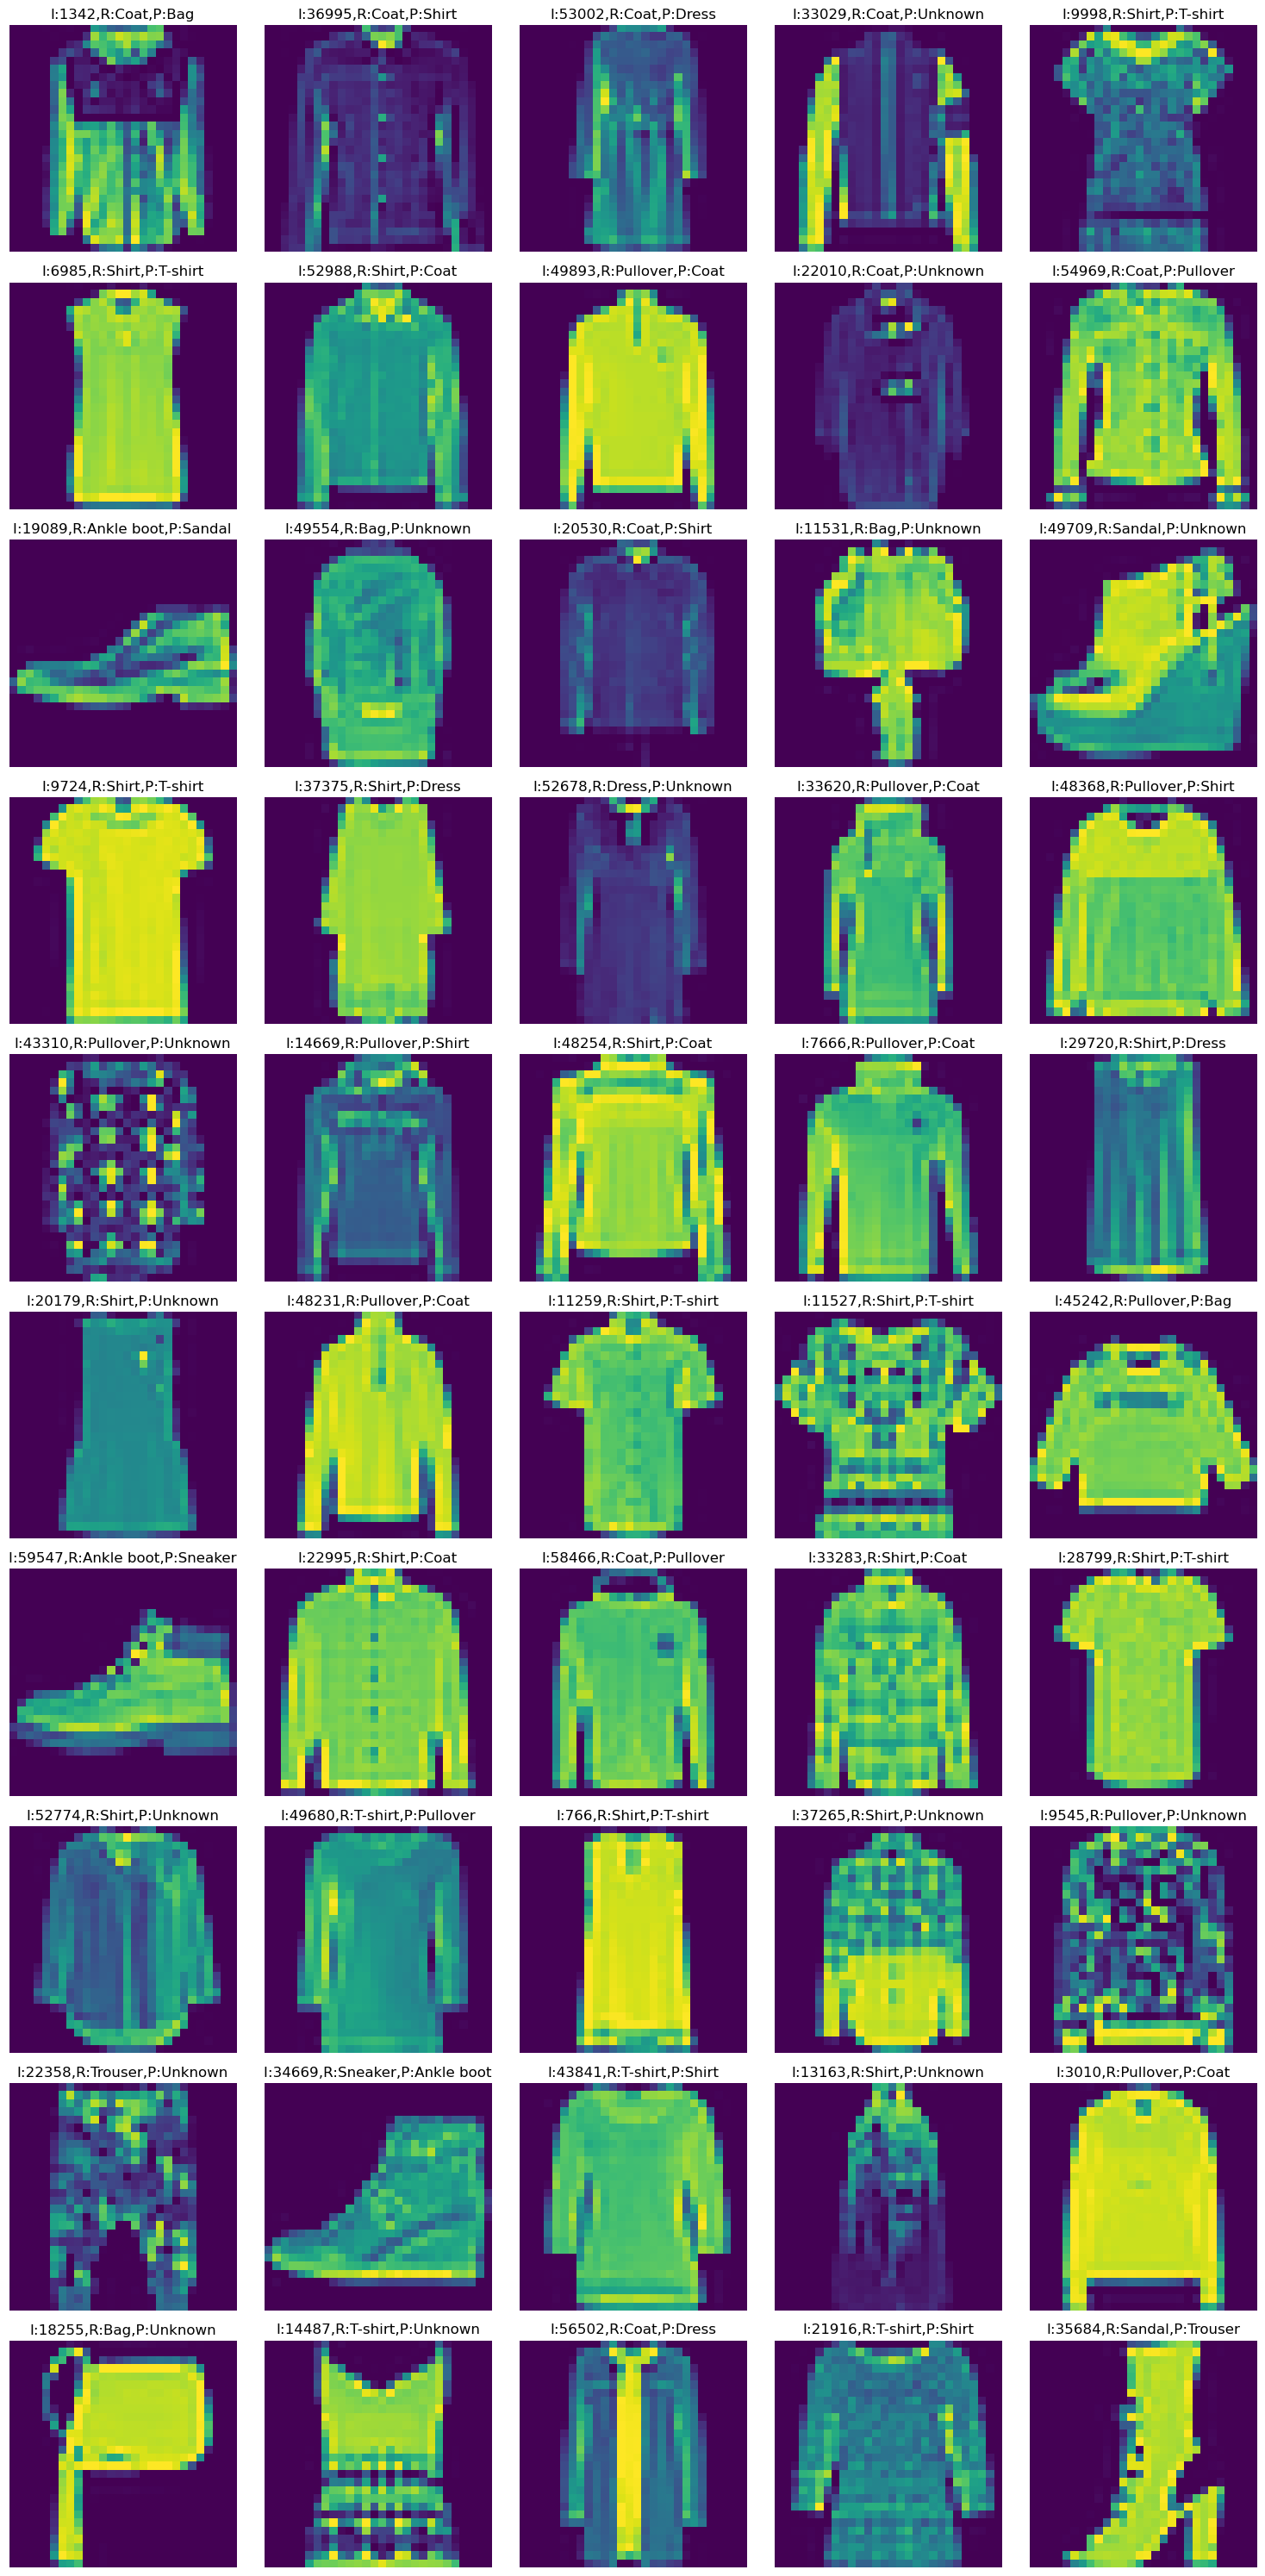

In [4]:
dataset = FashionMNIST(root='./data', train=True)
noise_cleaner.plot_false_positives(dataset=dataset, mistakes_count=9, count=50, labels=FashionMNIST_CLASSES)

# CIFAR10

## CIFAR 10 - 20

In [2]:
train_dataset = CIFAR10(root='data', train=True, download=True)
transform = transforms.Compose([
                                # transforms.Grayscale(num_output_channels=3),
                                transforms.ToTensor(),
                                transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))])

augmented_transform = transforms.Compose([
    transforms.RandomCrop(size=32, padding=4),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(15),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.4914, 0.4822, 0.4465], std=[0.2023, 0.1994, 0.2010])
])

new_augmented_transform = transforms.Compose([
    transforms.RandomRotation(degrees=15),        # Random rotation within 15 degrees
    transforms.RandomHorizontalFlip(p=0.5),      # Random horizontal flip
    transforms.RandomAffine(degrees=0, translate=(0.1, 0.1)), # Width and height shift
    transforms.RandomResizedCrop(size=32, scale=(0.9, 1.0)),  # Zoom-like effect
    transforms.ToTensor(),                        # Convert images to PyTorch tensors
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)) # Normalize
])

noise_cleaner = NoiseCleaner(train_dataset, noise_type='idn', model_save_path="cifar10/resnet50/model_resnet50_cifar10_fold_{}.pth", 
                             inner_folds_num=10, outer_folds_num=10, model='resnet50', train_noise_level=0.2, epochs_num=1000, train_pairs=200000, 
                             val_pairs=20000, embedding_dimension=64, lr=5e-5, optimizer='Adam', patience=8, transform=transform,
                             weight_decay=5e-4, training_batch_size=2048, pre_trained=True, dropout_prob=0.5, contrastive_ratio=1,
                             distance_meter='euclidian', augmented_transform=augmented_transform, trainable=True, pair_validation=False,
                             label_smoothing=0.1, loss='ce', margin=2, freeze_epoch=None, noisy_indices_path='cifar10/resnet50/fold{}_noisy_indices.csv',
                             prediction_path='cifar10/resnet50/fold{}_analysis.csv', mistakes_count=10, relabeling_range=range(6, 11))

Files already downloaded and verified
Seed: 51
noise count: 10208 out of 50000 data


In [3]:
noise_cleaner.save_noisy_dataset('cleaned', 'dirty')

100%|██████████| 50000/50000 [00:03<00:00, 12964.02it/s]

Noisy dataset saved to cleaned/dirty.pkl


In [5]:
noise_cleaner.clean()

Skipping outer fold 1 with results:
80.21077283372365% accuracy in 854 data
Loaded 854 noisy indices from cifar10/resnet50/fold1_noisy_indices.csv
Skipping outer fold 2 with results:
79.53488372093022% accuracy in 860 data
Loaded 860 noisy indices from cifar10/resnet50/fold2_noisy_indices.csv
Skipping outer fold 3 with results:
78.55504587155964% accuracy in 872 data
Loaded 872 noisy indices from cifar10/resnet50/fold3_noisy_indices.csv
Skipping outer fold 4 with results:
80.02466091245375% accuracy in 811 data
Loaded 811 noisy indices from cifar10/resnet50/fold4_noisy_indices.csv
Skipping outer fold 5 with results:
80.62770562770562% accuracy in 924 data
Loaded 924 noisy indices from cifar10/resnet50/fold5_noisy_indices.csv
Skipping outer fold 6 with results:
77.0011273957159% accuracy in 887 data
Loaded 887 noisy indices from cifar10/resnet50/fold6_noisy_indices.csv
Skipping outer fold 7 with results:
79.57992998833139% accuracy in 857 data
Loaded 857 noisy indices from cifar10/resne

              precision    recall  f1-score   support

       Clean     0.9762    0.8961    0.9344     39792
       Noisy     0.6932    0.9149    0.7887     10208

    accuracy                         0.8999     50000
   macro avg     0.8347    0.9055    0.8616     50000
weighted avg     0.9184    0.8999    0.9047     50000



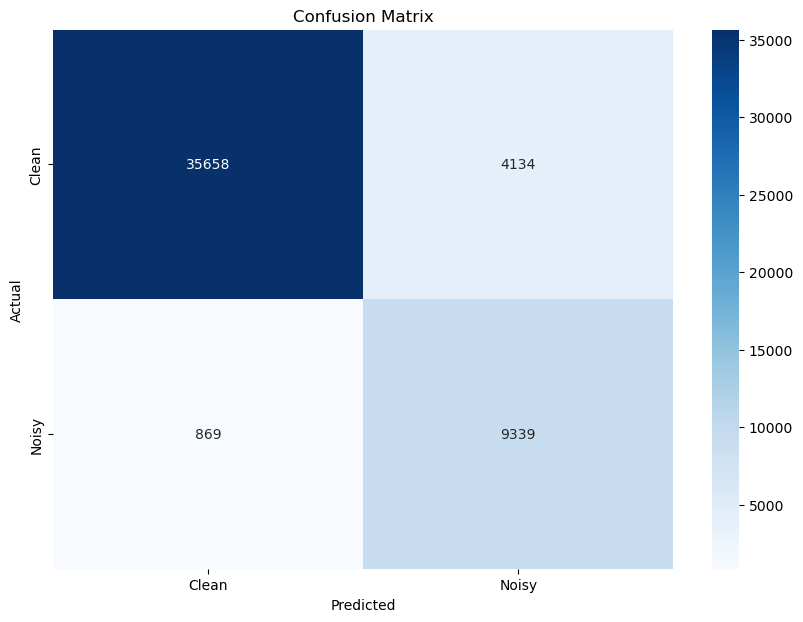

In [3]:
noise_cleaner.report(mistakes_count=8)

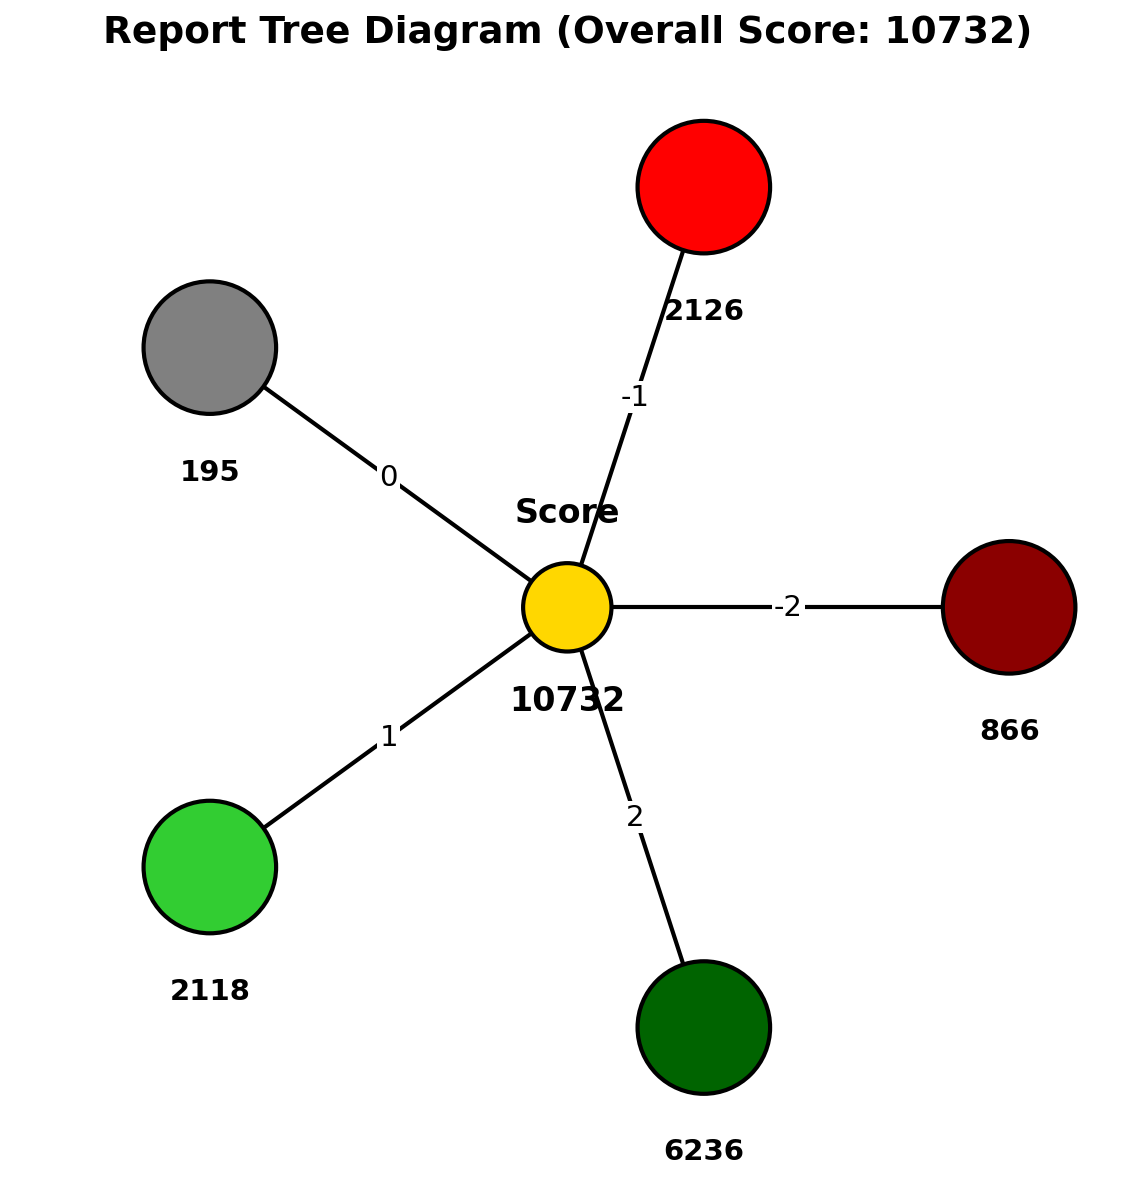

In [11]:
score, relabeling_report = noise_cleaner.calculate_relabeling_score(mistakes_count=9, relabel_threshold=9)

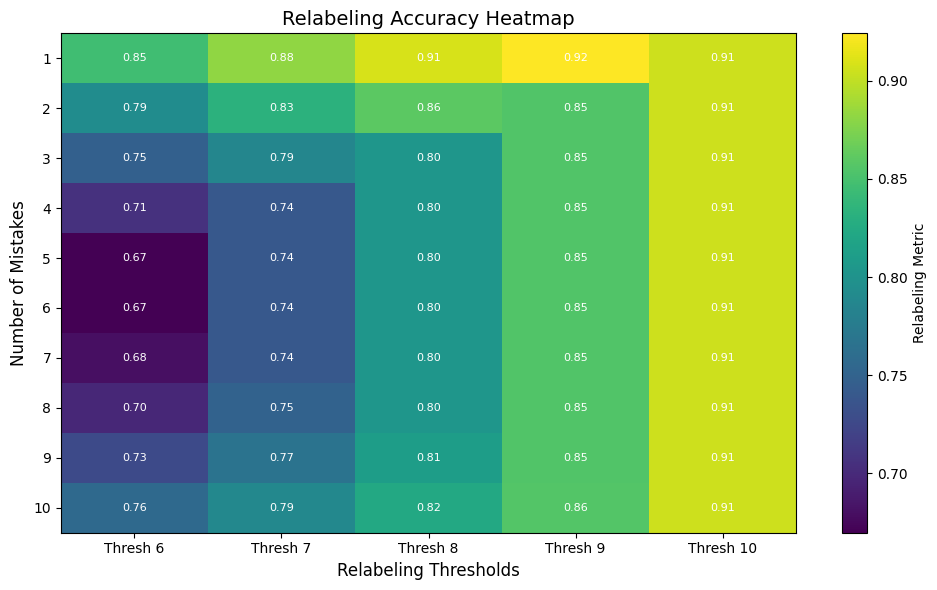

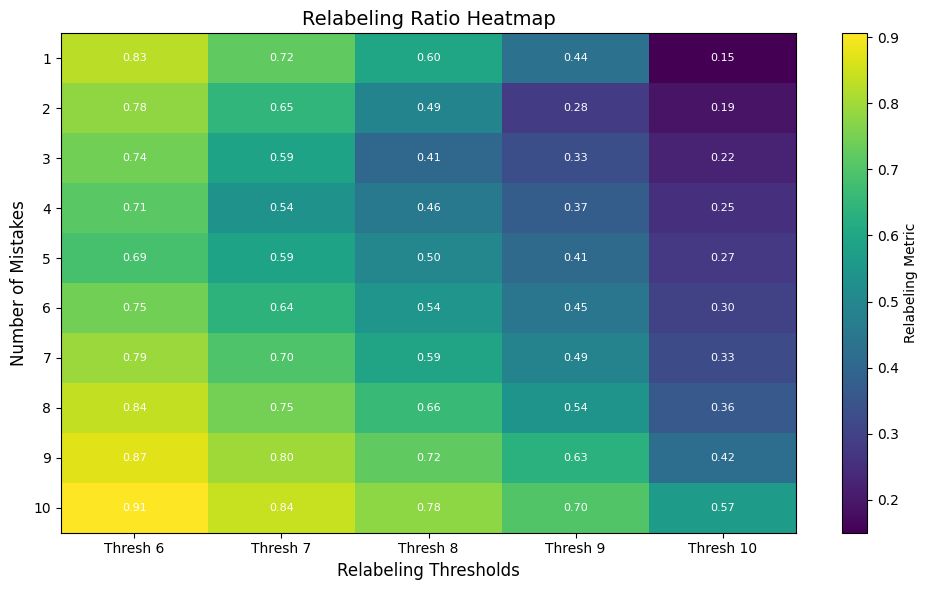

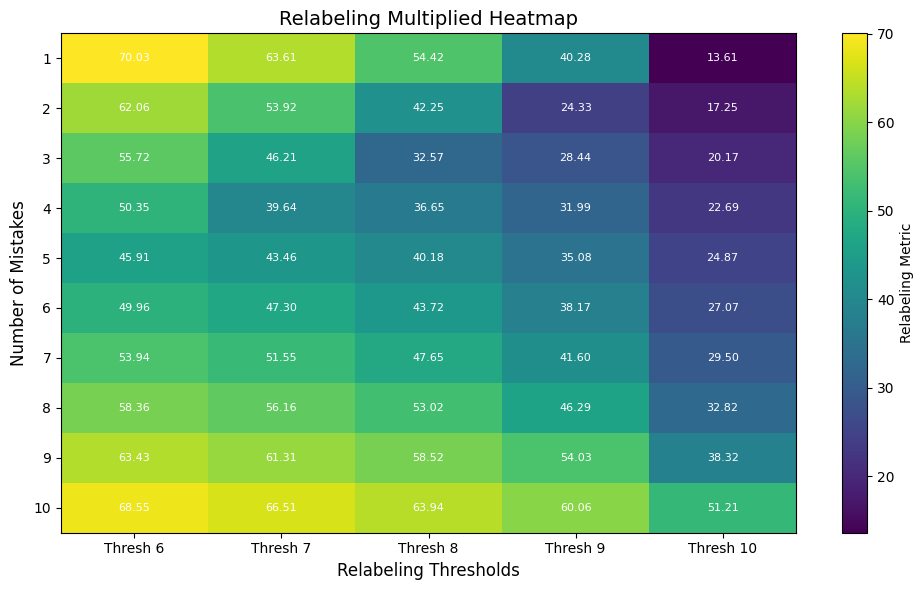

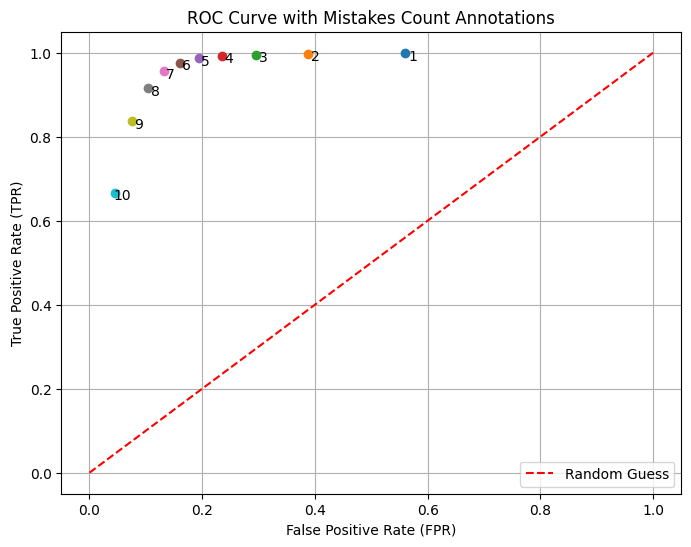

Area Under the Curve (AUC): 0.49907322987450103


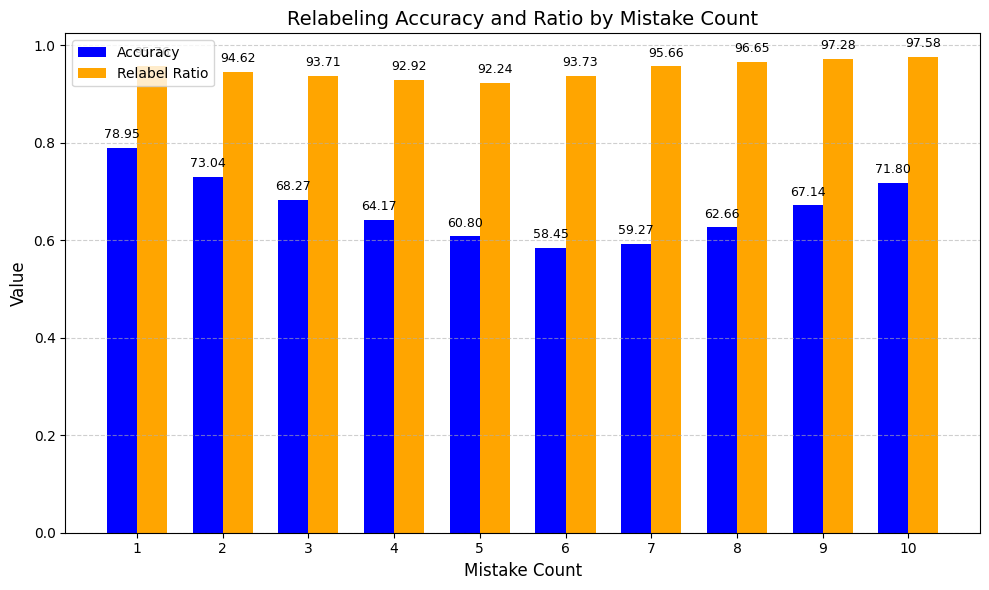

In [4]:
noise_cleaner.analyze()

Files already downloaded and verified
              precision    recall  f1-score   support

       Clean     0.9569    0.9248    0.9406     39792
       Noisy     0.7408    0.8375    0.7862     10208

    accuracy                         0.9070     50000
   macro avg     0.8488    0.8811    0.8634     50000
weighted avg     0.9127    0.9070    0.9090     50000



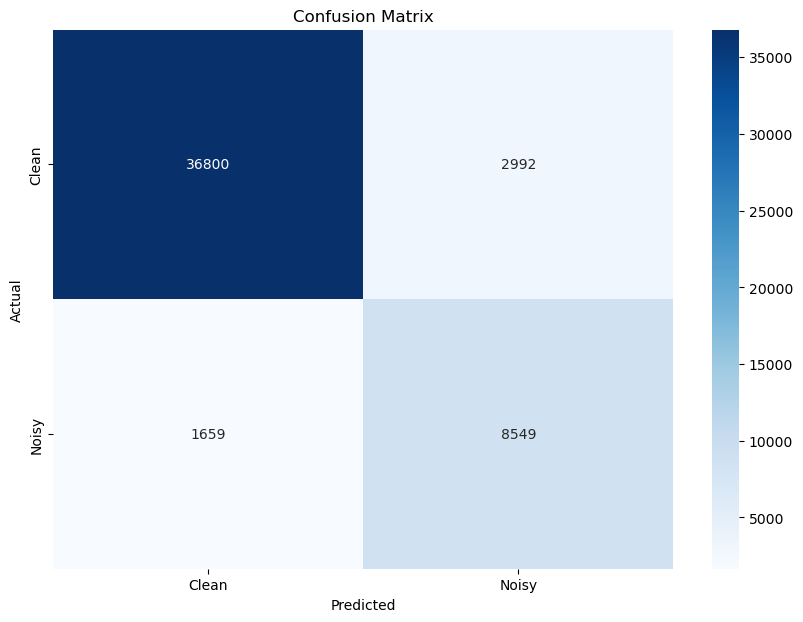

              precision    recall  f1-score   support

       Clean     0.8577    0.9343    0.8944     39792
       Noisy     0.6074    0.3960    0.4794     10208

    accuracy                         0.8244     50000
   macro avg     0.7326    0.6651    0.6869     50000
weighted avg     0.8066    0.8244    0.8097     50000



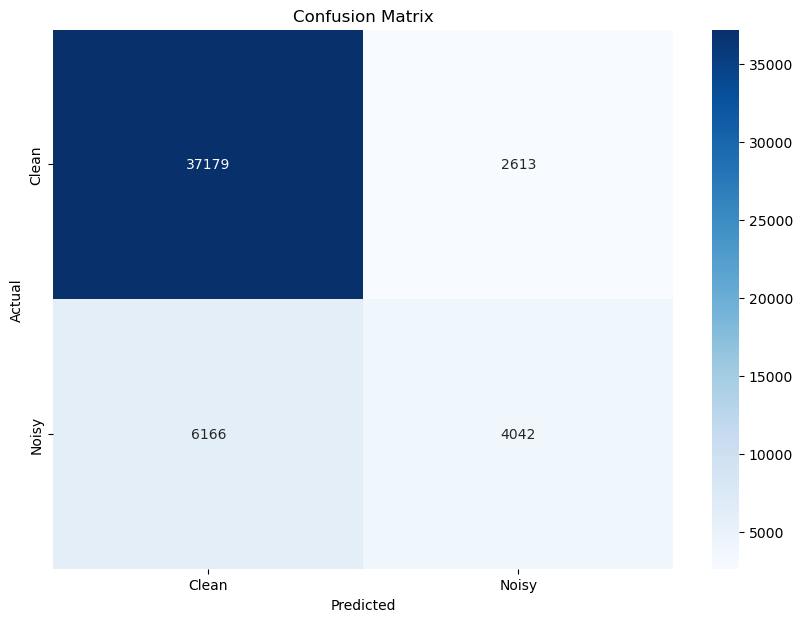

6655 removed from dataset and 4886 relabled
4.90% noise remained in 43345 data


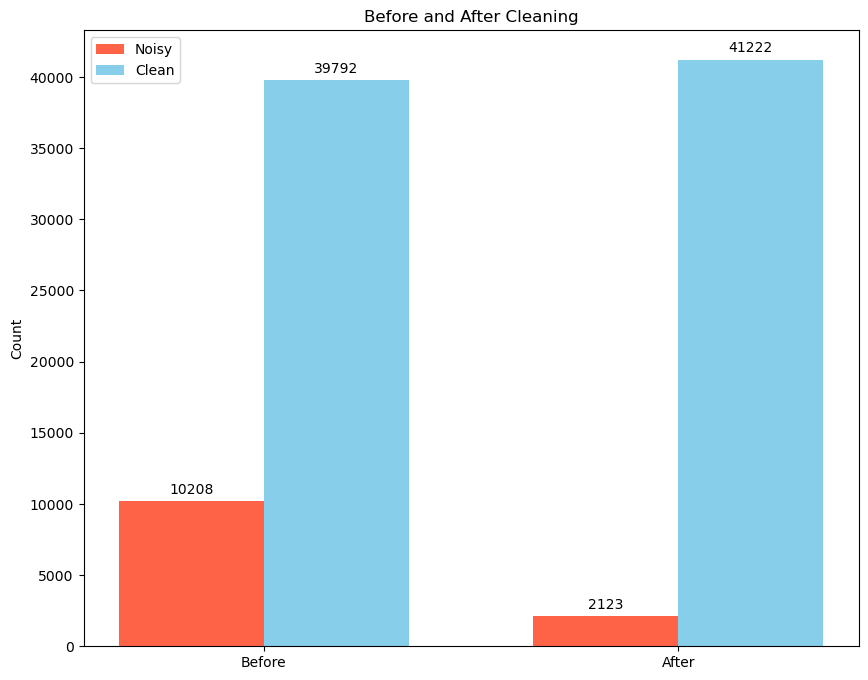

100%|██████████| 43345/43345 [00:01<00:00, 38123.33it/s]

Cleaned dataset saved to cleaned/Advanced-CIFAR10-20.pkl


In [13]:
dataset = CIFAR10(root='data', train=True, download=True)
manual_cleaned = noise_cleaner.advanced_clean(dataset=dataset, mistakes_count=9, relabel_threshold=10)
noise_cleaner.save_cleaned_cifar_dataset_manual(manual_cleaned, 'cleaned', 'Advanced-CIFAR10-20')

In [6]:
noise_cleaner.save_cleaned_cifar_dataset('cleaned', 'CIFAR10')

100%|██████████| 41150/41150 [00:01<00:00, 21517.98it/s]

Cleaned dataset saved to cleaned/CIFAR10.pkl


Files already downloaded and verified


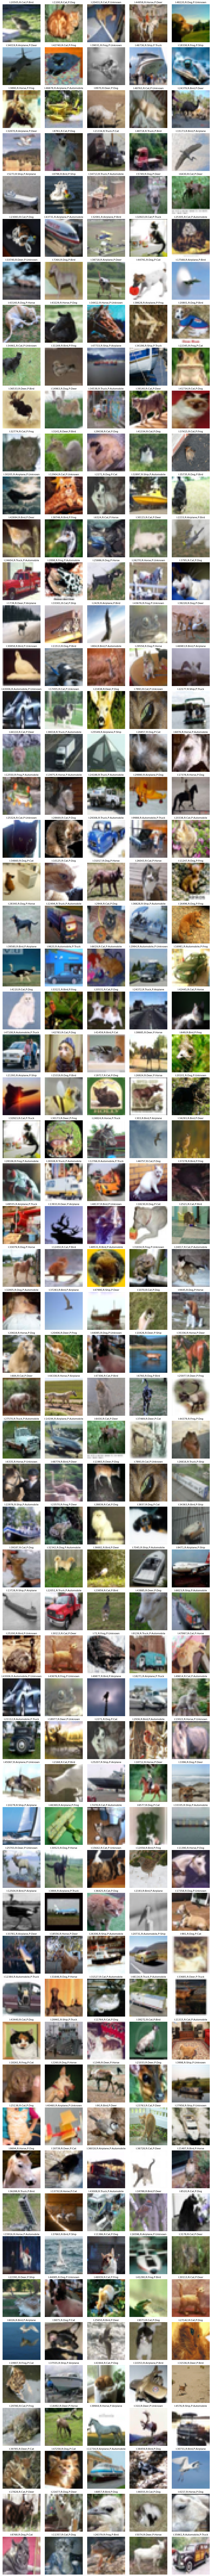

In [13]:
dataset = CIFAR10(root='data', train=True, download=True)
noise_cleaner.plot_false_positives(dataset=dataset, mistakes_count=9, count=300, labels=CIFAR10_CLASSES)

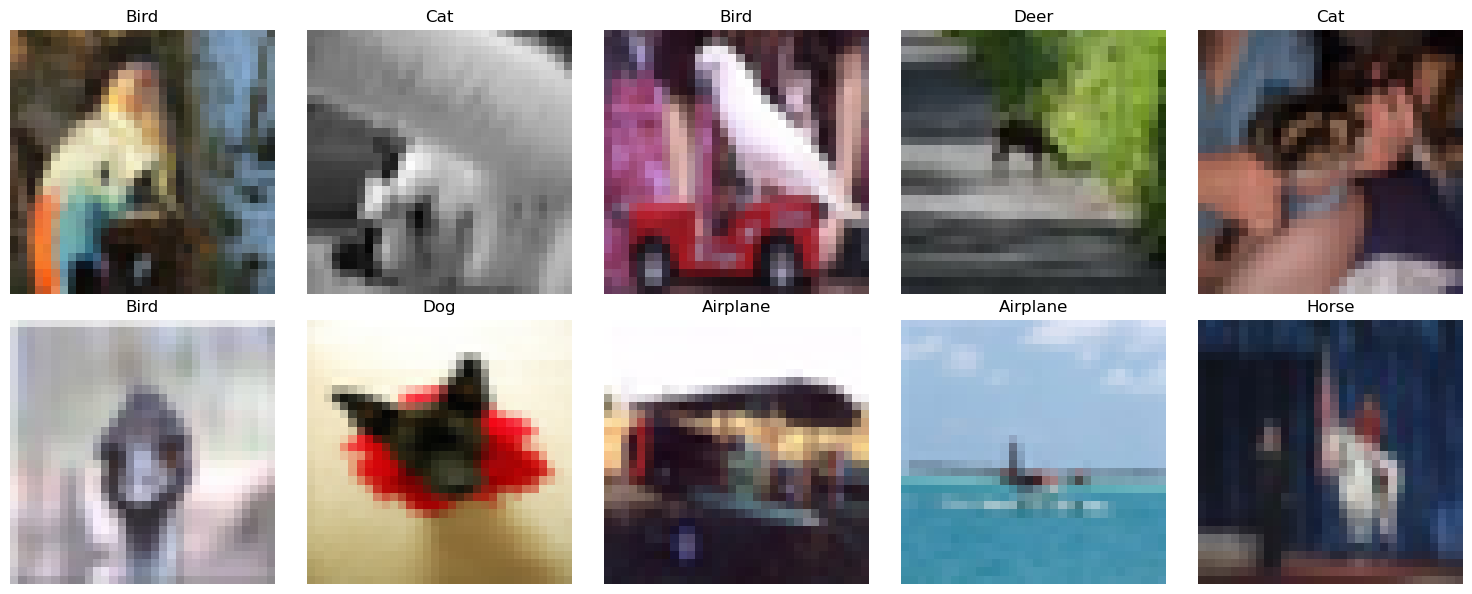

In [14]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

def plot_strange_samples(dataset, ids):
    # select the top 10 samples from ids
    ids = ids[:10]
    images = []
    labels = []
    for idx in ids:
        img, label = dataset[idx]
        array_image = np.array(img)
        image = Image.fromarray(array_image)
        label_text = CIFAR10_CLASSES[label]
        images.append(image)
        labels.append(label_text)
        
    # create subplots with 2 rows and 5 columns
    fig, axes = plt.subplots(2, 5, figsize=(15, 6))
    axes = axes.flatten()
    for ax, im, l in zip(axes, images, labels):
        ax.imshow(im)
        ax.axis('off')
        ax.set_title(l)
    plt.tight_layout()
    plt.savefig("strange_samples.pdf")
    plt.show()
    
array = [23642, 11387, 15696, 5619, 29187, 12287, 49472, 36018, 22796, 15916]
plot_strange_samples(dataset, array)

Files already downloaded and verified


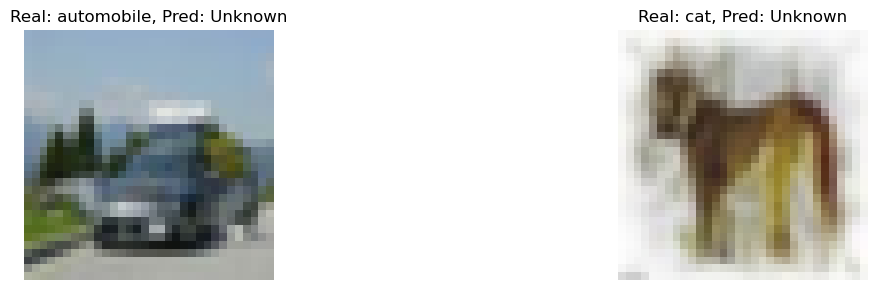

In [15]:
dataset = CIFAR10(root='data', train=True, download=True)
noise_cleaner.plot_unknown(dataset=dataset, mistakes_count=10, count=2, labels=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck'])

## CIFAR10 - 30

In [2]:
train_dataset = CIFAR10(root='data', train=True, download=True)
transform = transforms.Compose([
                                # transforms.Grayscale(num_output_channels=3),
                                transforms.ToTensor(),
                                transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))])

augmented_transform = transforms.Compose([
    transforms.RandomCrop(size=32, padding=4),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(15),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.4914, 0.4822, 0.4465], std=[0.2023, 0.1994, 0.2010])
])

new_augmented_transform = transforms.Compose([
    transforms.RandomRotation(degrees=15),        # Random rotation within 15 degrees
    transforms.RandomHorizontalFlip(p=0.5),      # Random horizontal flip
    transforms.RandomAffine(degrees=0, translate=(0.1, 0.1)), # Width and height shift
    transforms.RandomResizedCrop(size=32, scale=(0.9, 1.0)),  # Zoom-like effect
    transforms.ToTensor(),                        # Convert images to PyTorch tensors
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)) # Normalize
])

noise_cleaner = NoiseCleaner(train_dataset, noise_type='idn', model_save_path="cifar10(30)/resnet50/model_resnet50_cifar10_fold_{}.pth", 
                             inner_folds_num=10, outer_folds_num=10, model='resnet50', train_noise_level=0.3, epochs_num=1000, train_pairs=200000, 
                             val_pairs=20000, embedding_dimension=64, lr=5e-5, optimizer='Adam', patience=10, transform=transform,
                             weight_decay=5e-4, training_batch_size=2048, pre_trained=True, dropout_prob=0.5, contrastive_ratio=1,
                             distance_meter='euclidian', augmented_transform=augmented_transform, trainable=True, pair_validation=False,
                             label_smoothing=0.1, loss='ce', margin=2, freeze_epoch=None, noisy_indices_path='cifar10(30)/resnet50/fold{}_noisy_indices.csv',
                             prediction_path='cifar10(30)/resnet50/fold{}_analysis.csv', mistakes_count=10, relabeling_range=range(6, 11))

Files already downloaded and verified
Seed: 51
noise count: 14976 out of 50000 data


In [3]:
noise_cleaner.clean()

Skipping outer fold 1 with results:
72.09847596717468% accuracy in 853 data
Loaded 853 noisy indices from cifar10(30)/resnet50/fold1_noisy_indices.csv
Skipping outer fold 2 with results:
74.22434367541766% accuracy in 838 data
Loaded 838 noisy indices from cifar10(30)/resnet50/fold2_noisy_indices.csv
Skipping outer fold 3 with results:
74.74048442906575% accuracy in 867 data
Loaded 867 noisy indices from cifar10(30)/resnet50/fold3_noisy_indices.csv
Skipping outer fold 4 with results:
78.2668500687758% accuracy in 727 data
Loaded 727 noisy indices from cifar10(30)/resnet50/fold4_noisy_indices.csv
Skipping outer fold 5 with results:
74.47306791569088% accuracy in 854 data
Loaded 854 noisy indices from cifar10(30)/resnet50/fold5_noisy_indices.csv
Skipping outer fold 6 with results:
77.1604938271605% accuracy in 810 data
Loaded 810 noisy indices from cifar10(30)/resnet50/fold6_noisy_indices.csv
Skipping outer fold 7 with results:
76.58371040723982% accuracy in 884 data
Loaded 884 noisy ind

              precision    recall  f1-score   support

       Clean     0.9119    0.8018    0.8533     35024
       Noisy     0.6386    0.8188    0.7176     14976

    accuracy                         0.8069     50000
   macro avg     0.7752    0.8103    0.7854     50000
weighted avg     0.8300    0.8069    0.8127     50000



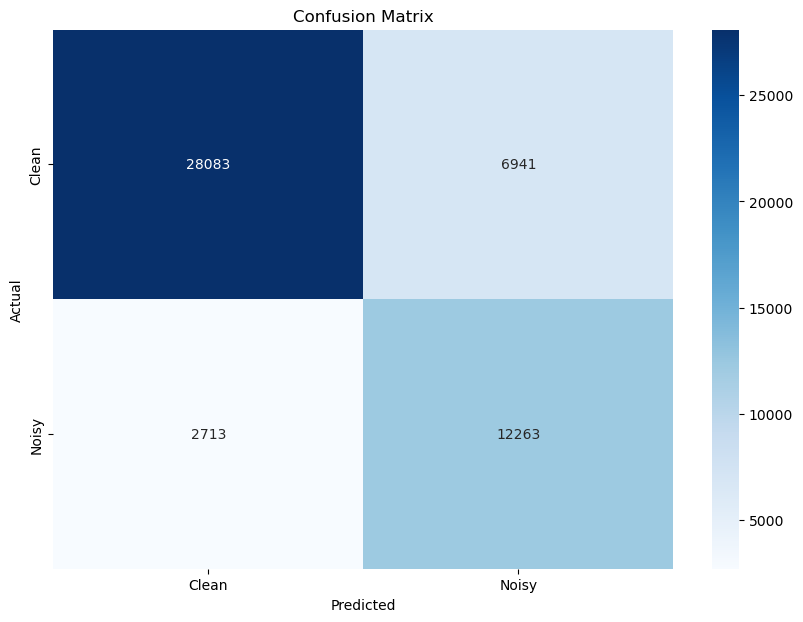

In [8]:
noise_cleaner.report(mistakes_count=7)

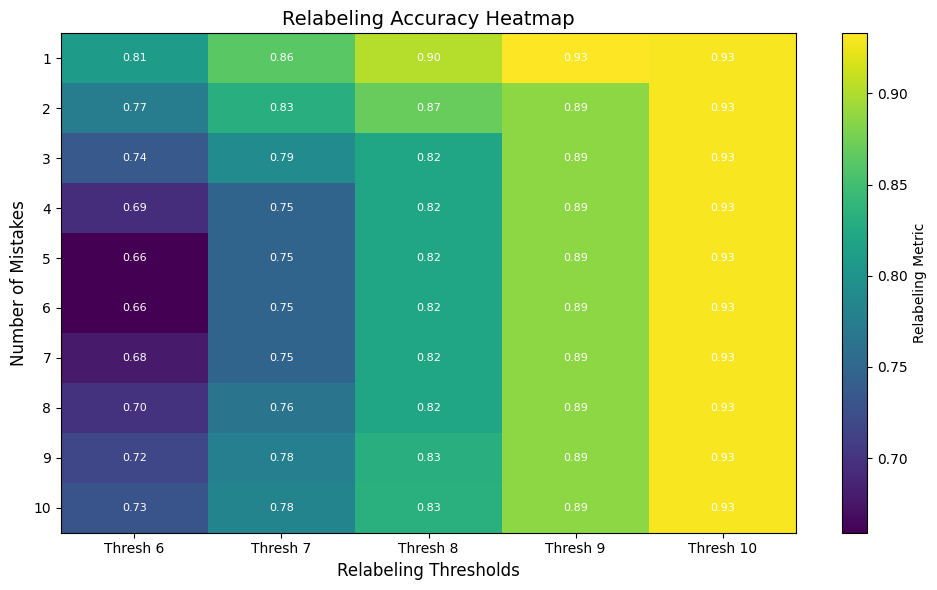

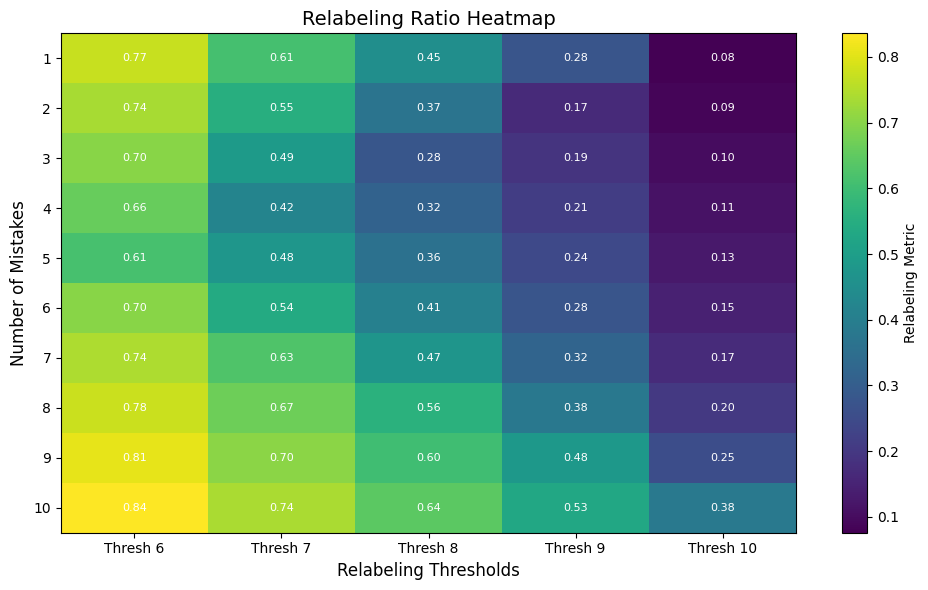

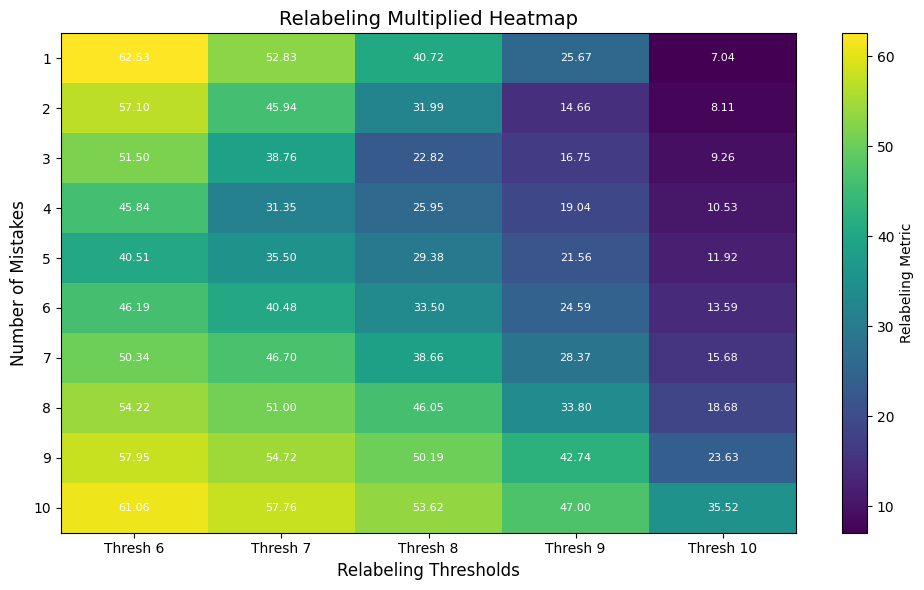

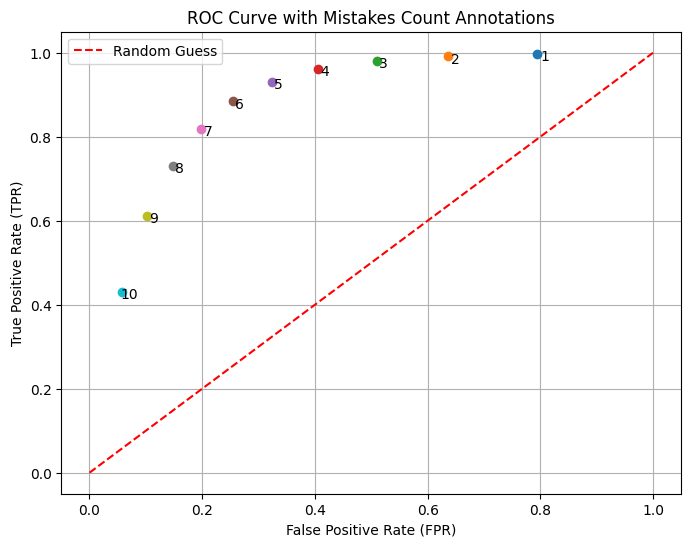

Area Under the Curve (AUC): 0.6646810900562569


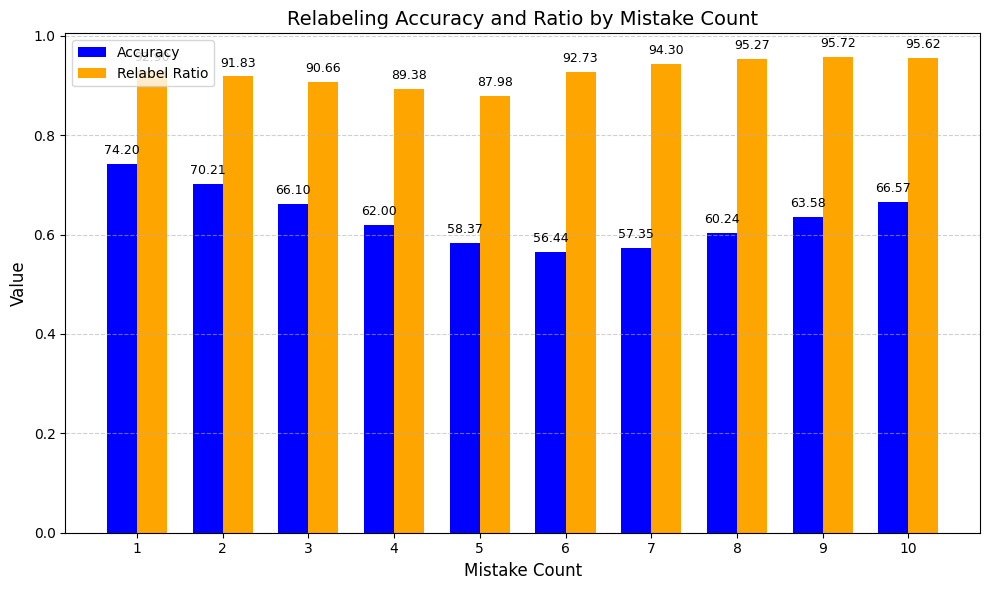

In [4]:
noise_cleaner.analyze()

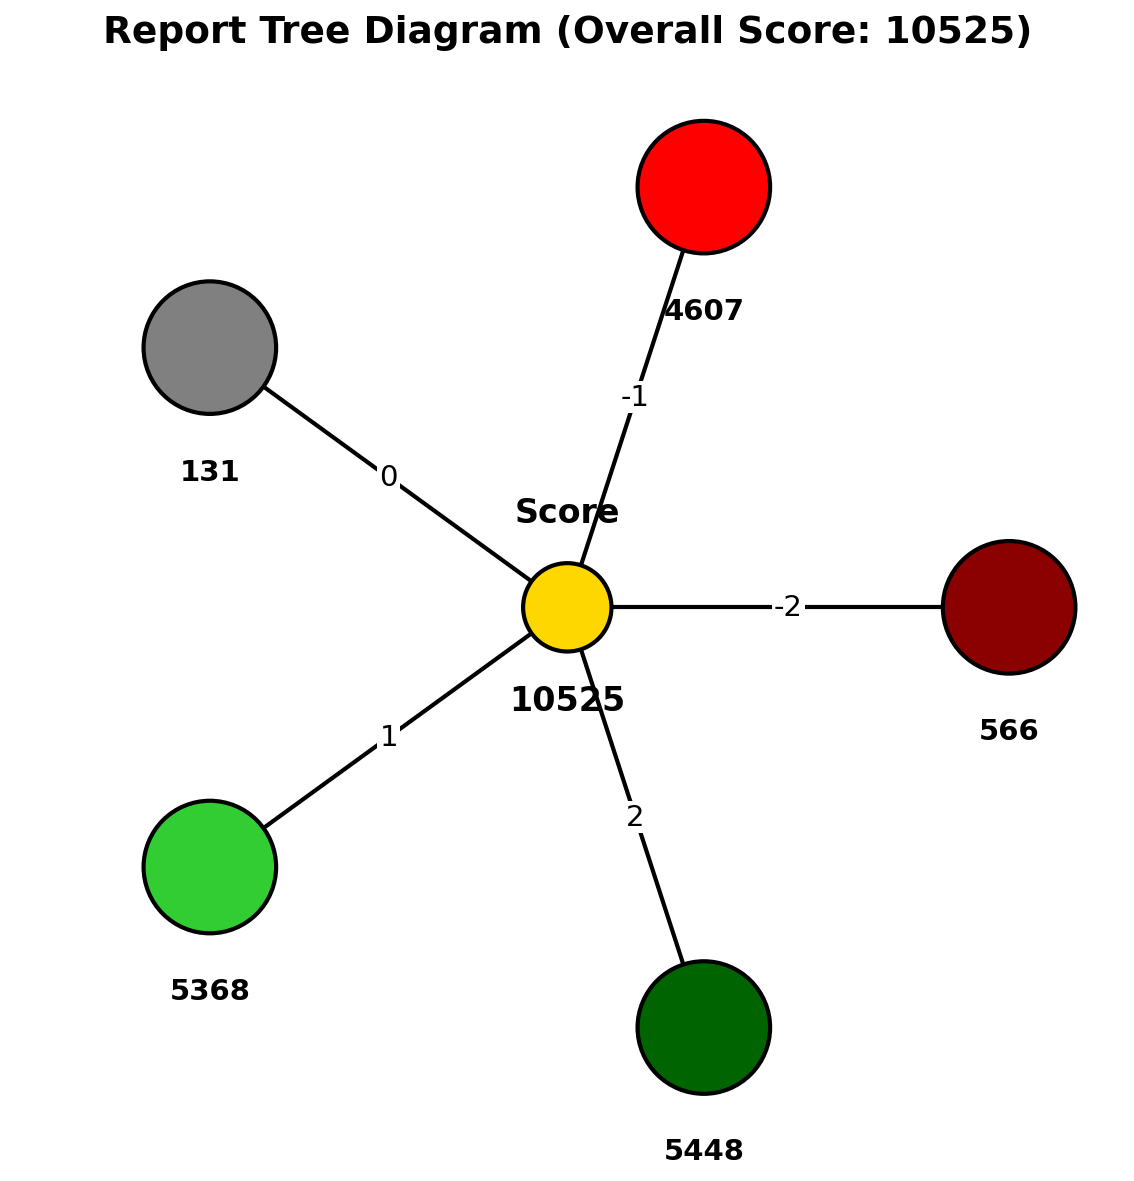

In [17]:
score, relabeling_report = noise_cleaner.calculate_relabeling_score(mistakes_count=8, relabel_threshold=9)

Files already downloaded and verified
              precision    recall  f1-score   support

       Clean     0.9119    0.8018    0.8533     35024
       Noisy     0.6386    0.8188    0.7176     14976

    accuracy                         0.8069     50000
   macro avg     0.7752    0.8103    0.7854     50000
weighted avg     0.8300    0.8069    0.8127     50000



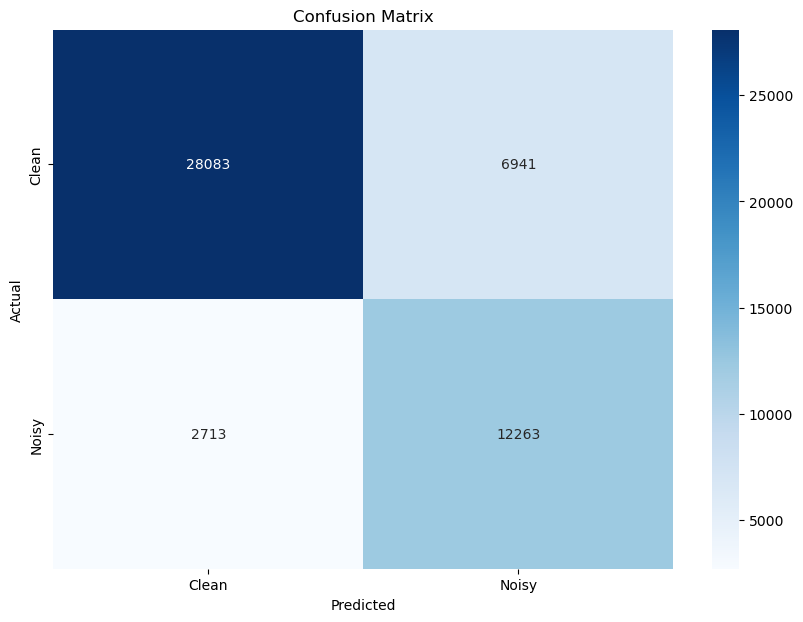

              precision    recall  f1-score   support

       Clean     0.7380    0.8395    0.7855     35024
       Noisy     0.4467    0.3030    0.3610     14976

    accuracy                         0.6788     50000
   macro avg     0.5923    0.5712    0.5733     50000
weighted avg     0.6507    0.6788    0.6584     50000



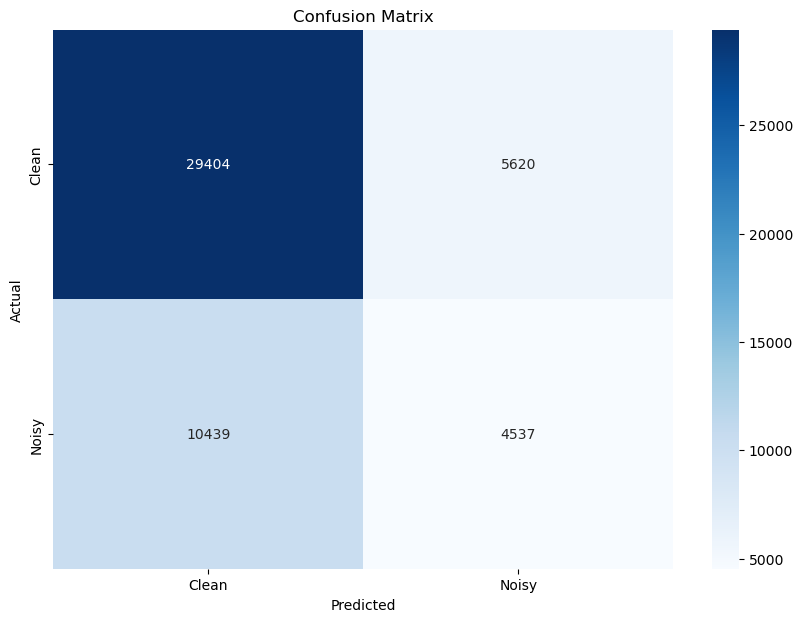

10157 removed from dataset and 9047 relabled
10.88% noise remained in 39843 data


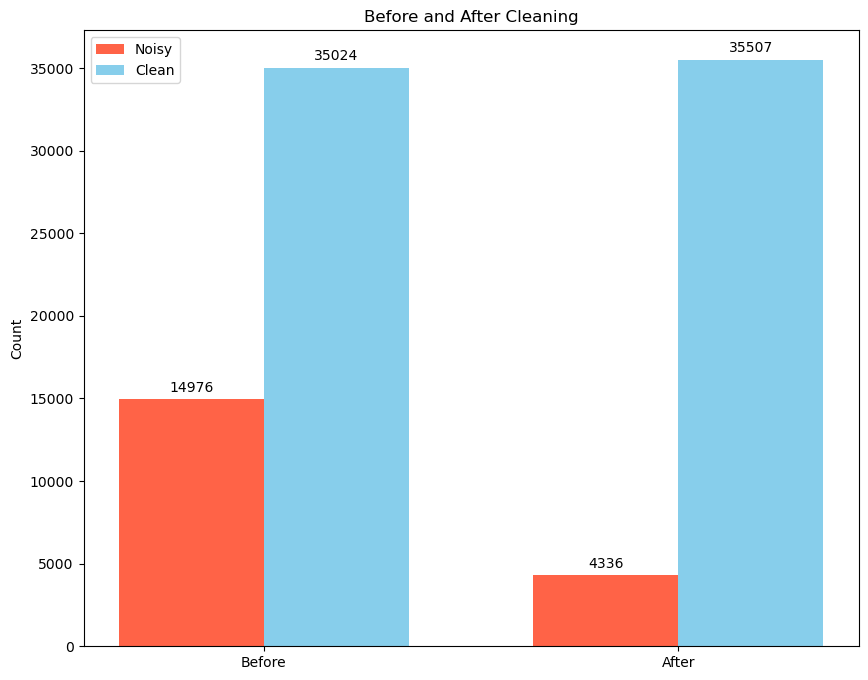

100%|██████████| 39843/39843 [00:01<00:00, 38997.19it/s]

Cleaned dataset saved to cleaned/Advanced-CIFAR10-30.pkl


In [19]:
dataset = CIFAR10(root='data', train=True, download=True)
manual_cleaned = noise_cleaner.advanced_clean(dataset=dataset, mistakes_count=7, relabel_threshold=8)
noise_cleaner.save_cleaned_cifar_dataset_manual(manual_cleaned, 'cleaned', 'Advanced-CIFAR10-30')

## CIFAR10 - 40

In [2]:
train_dataset = CIFAR10(root='data', train=True, download=True)
transform = transforms.Compose([
                                # transforms.Grayscale(num_output_channels=3),
                                transforms.ToTensor(),
                                transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))])

augmented_transform = transforms.Compose([
    transforms.RandomCrop(size=32, padding=4),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(15),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.4914, 0.4822, 0.4465], std=[0.2023, 0.1994, 0.2010])
])

new_augmented_transform = transforms.Compose([
    transforms.RandomRotation(degrees=15),        # Random rotation within 15 degrees
    transforms.RandomHorizontalFlip(p=0.5),      # Random horizontal flip
    transforms.RandomAffine(degrees=0, translate=(0.1, 0.1)), # Width and height shift
    transforms.RandomResizedCrop(size=32, scale=(0.9, 1.0)),  # Zoom-like effect
    transforms.ToTensor(),                        # Convert images to PyTorch tensors
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)) # Normalize
])

noise_cleaner = NoiseCleaner(train_dataset, noise_type='idn', model_save_path="cifar10(40)/resnet50/model_resnet50_cifar10_fold_{}.pth", 
                             inner_folds_num=10, outer_folds_num=10, model='resnet50', train_noise_level=0.4, epochs_num=1000, train_pairs=200000, 
                             val_pairs=20000, embedding_dimension=64, lr=5e-5, optimizer='Adam', patience=15, transform=transform,
                             weight_decay=5e-4, training_batch_size=2048, pre_trained=True, dropout_prob=0.5, contrastive_ratio=1,
                             distance_meter='euclidian', augmented_transform=new_augmented_transform, trainable=True, pair_validation=False,
                             label_smoothing=0.1, loss='ce', margin=2, freeze_epoch=None, noisy_indices_path='cifar10(40)/resnet50/fold{}_noisy_indices.csv',
                             prediction_path='cifar10(40)/resnet50/fold{}_analysis.csv', mistakes_count=10, relabeling_range=range(6, 11))

Files already downloaded and verified
Seed: 51
noise count: 19803 out of 50000 data


              precision    recall  f1-score   support

       Clean     0.7386    0.5522    0.6319     30197
       Noisy     0.5069    0.7021    0.5887     19803

    accuracy                         0.6115     50000
   macro avg     0.6228    0.6271    0.6103     50000
weighted avg     0.6469    0.6115    0.6148     50000



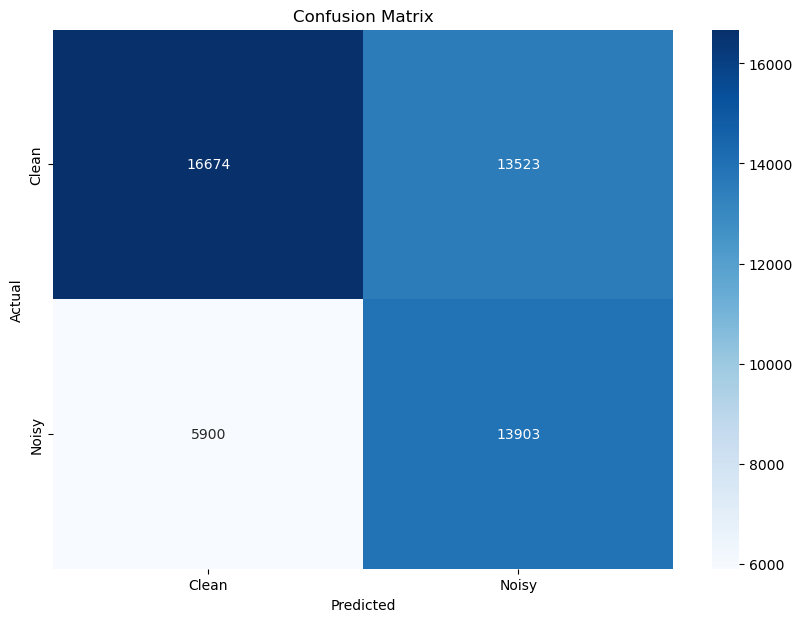

In [29]:
noise_cleaner.report(mistakes_count=6)

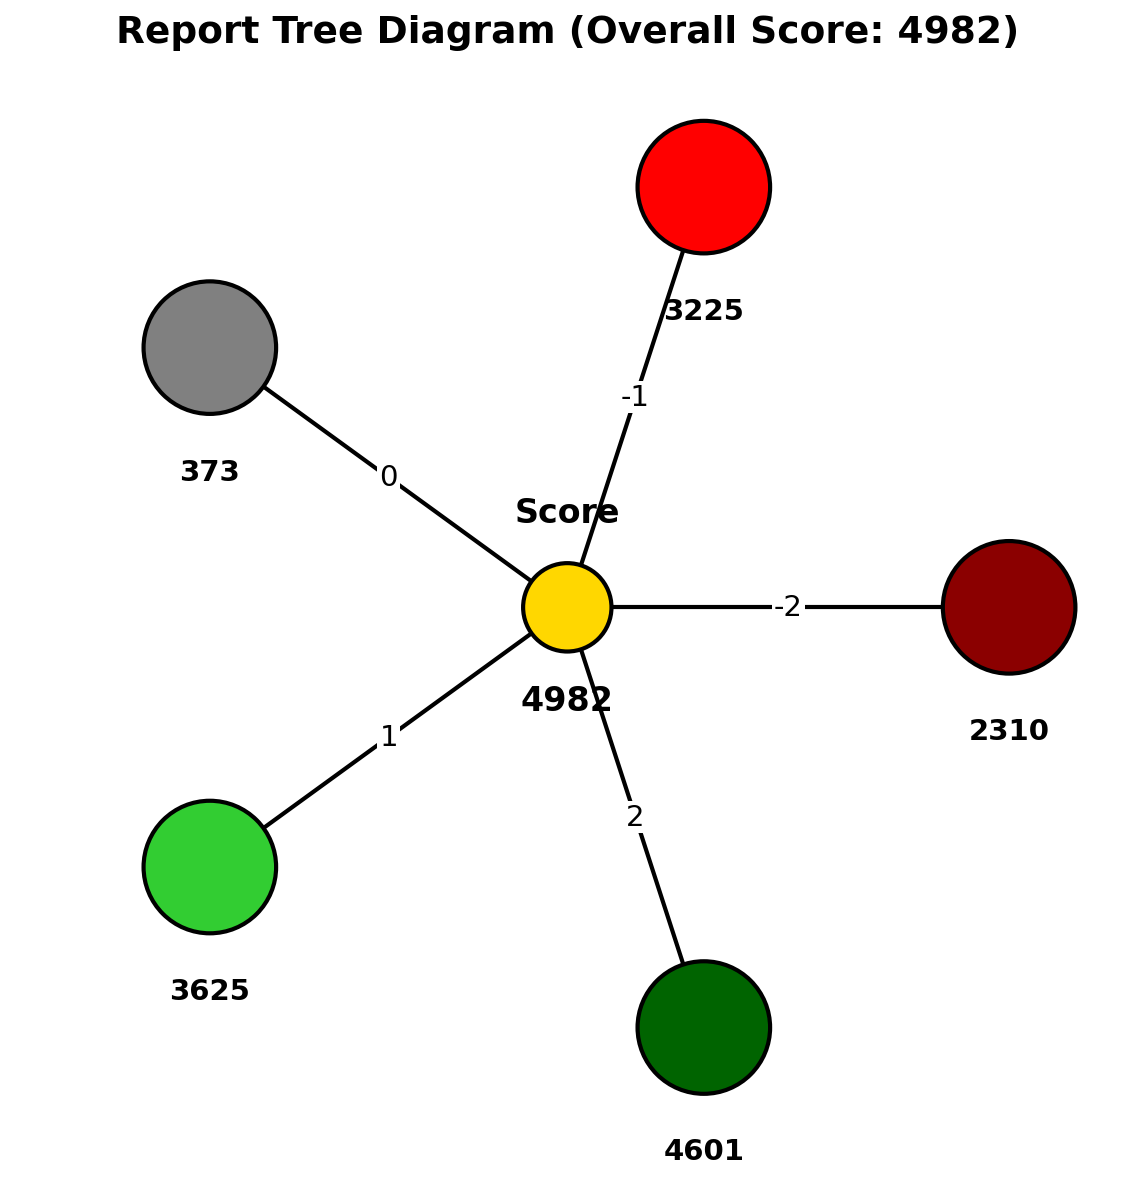

(4982, {'-2': 2310, '-1': 3225, '0': 373, '1': 3625, '2': 4601})

In [18]:
noise_cleaner.calculate_relabeling_score(mistakes_count=9, relabel_threshold=8)

In [3]:
noise_cleaner.clean()

Skipping outer fold 1 with results:
70.13729977116705% accuracy in 874 data
Loaded 874 noisy indices from cifar10(40)/resnet50/fold1_noisy_indices.csv
Skipping outer fold 2 with results:
63.282937365010795% accuracy in 926 data
Loaded 926 noisy indices from cifar10(40)/resnet50/fold2_noisy_indices.csv
Skipping outer fold 3 with results:
69.01408450704226% accuracy in 923 data
Loaded 923 noisy indices from cifar10(40)/resnet50/fold3_noisy_indices.csv
Skipping outer fold 4 with results:
71.32947976878613% accuracy in 865 data
Loaded 865 noisy indices from cifar10(40)/resnet50/fold4_noisy_indices.csv
Skipping outer fold 5 with results:
67.70114942528735% accuracy in 870 data
Loaded 870 noisy indices from cifar10(40)/resnet50/fold5_noisy_indices.csv
Skipping outer fold 6 with results:
63.24884792626728% accuracy in 868 data
Loaded 868 noisy indices from cifar10(40)/resnet50/fold6_noisy_indices.csv
Skipping outer fold 7 with results:
68.40148698884758% accuracy in 807 data
Loaded 807 noisy 

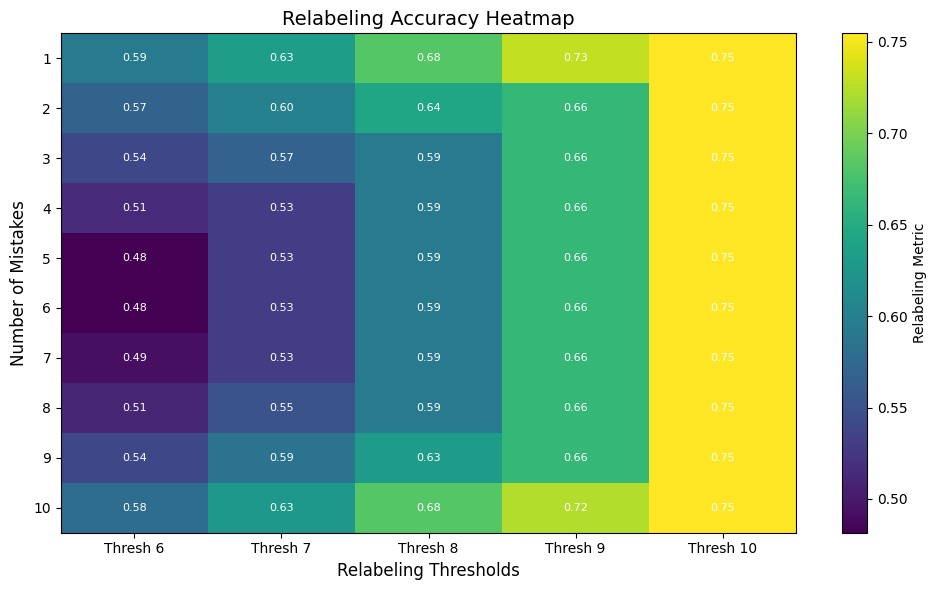

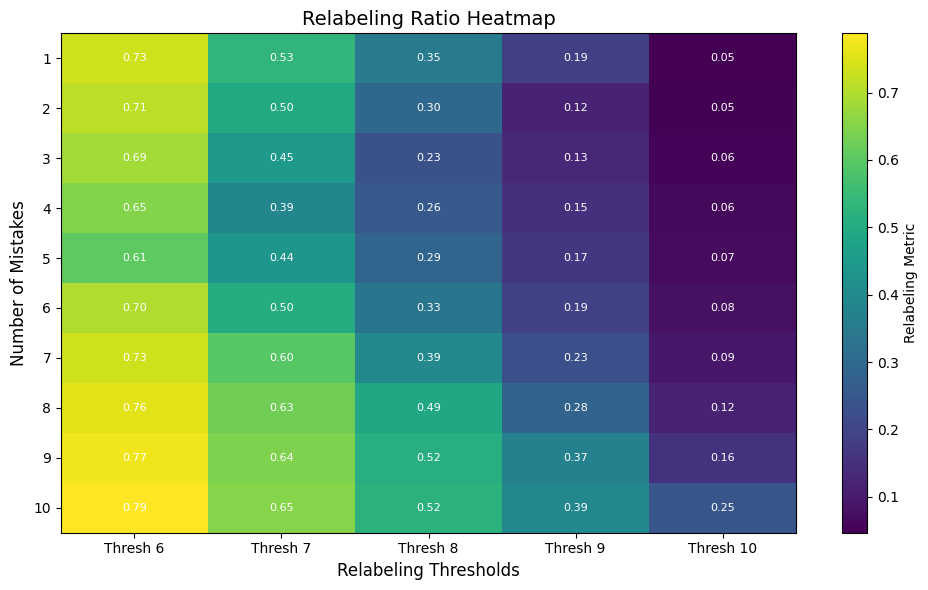

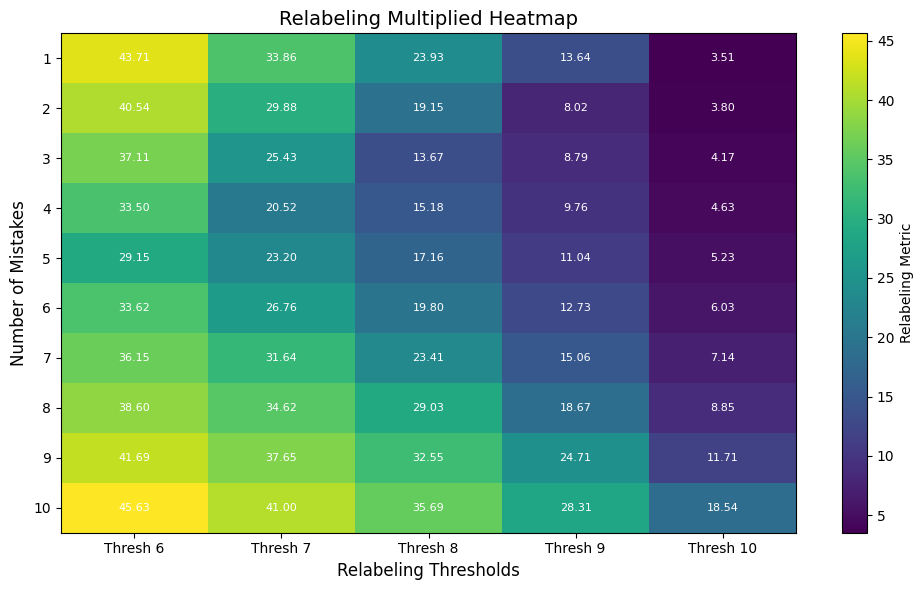

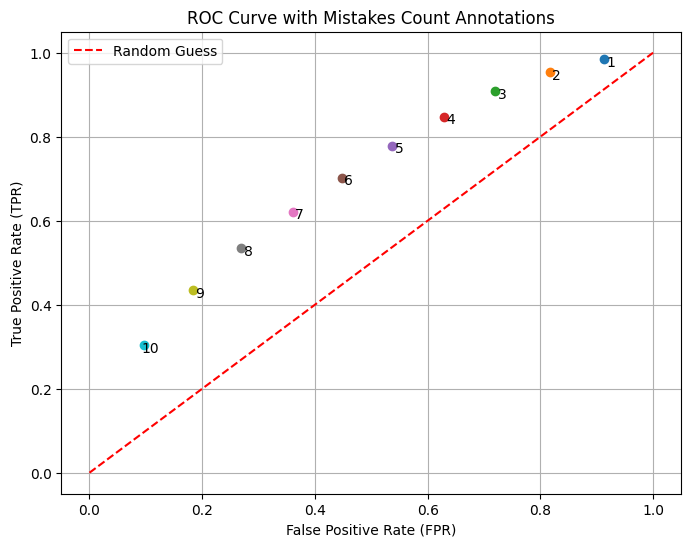

Area Under the Curve (AUC): 0.589056895488616


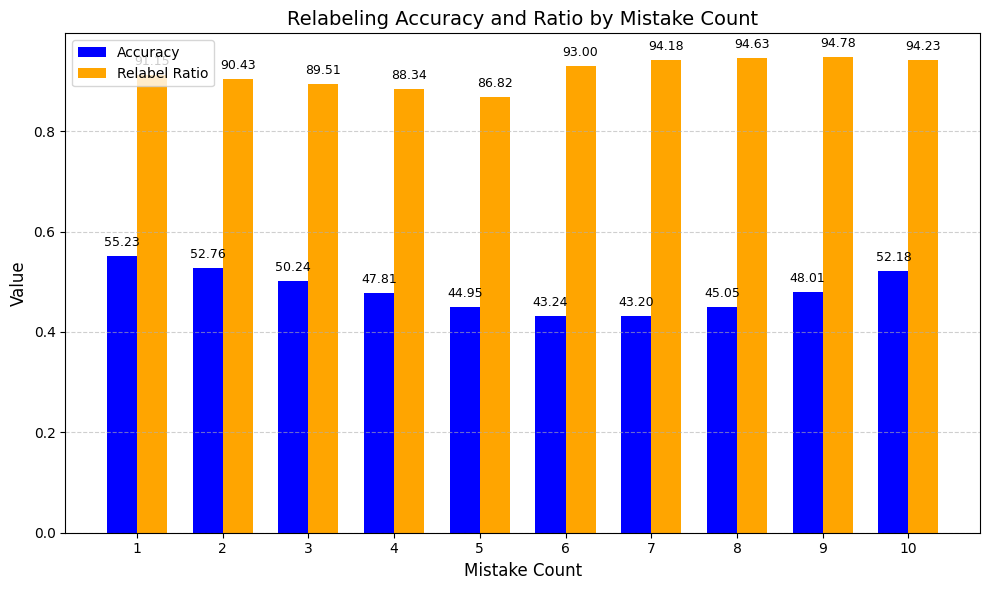

In [4]:
noise_cleaner.analyze()

Files already downloaded and verified
              precision    recall  f1-score   support

       Clean     0.7386    0.5522    0.6319     30197
       Noisy     0.5069    0.7021    0.5887     19803

    accuracy                         0.6115     50000
   macro avg     0.6228    0.6271    0.6103     50000
weighted avg     0.6469    0.6115    0.6148     50000



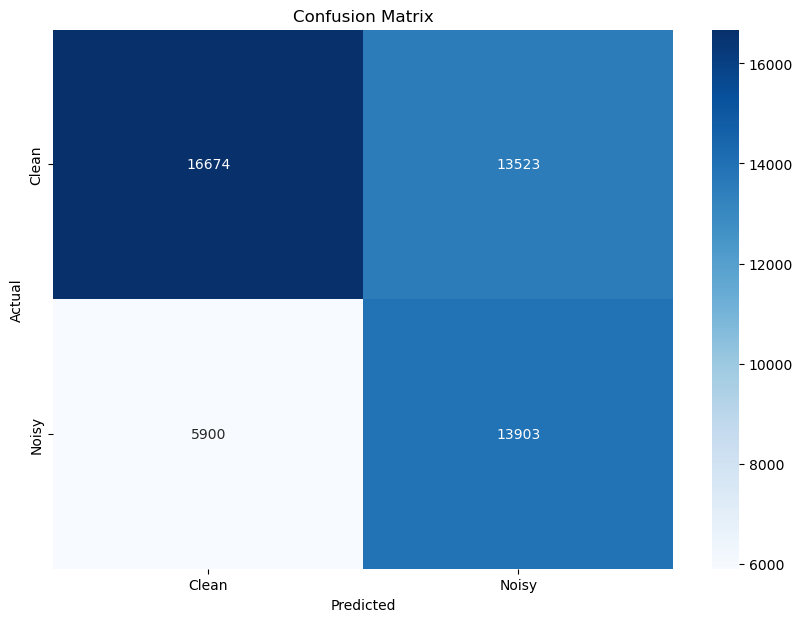

              precision    recall  f1-score   support

       Clean     0.6932    0.5685    0.6247     30197
       Noisy     0.4837    0.6163    0.5420     19803

    accuracy                         0.5874     50000
   macro avg     0.5884    0.5924    0.5833     50000
weighted avg     0.6102    0.5874    0.5919     50000



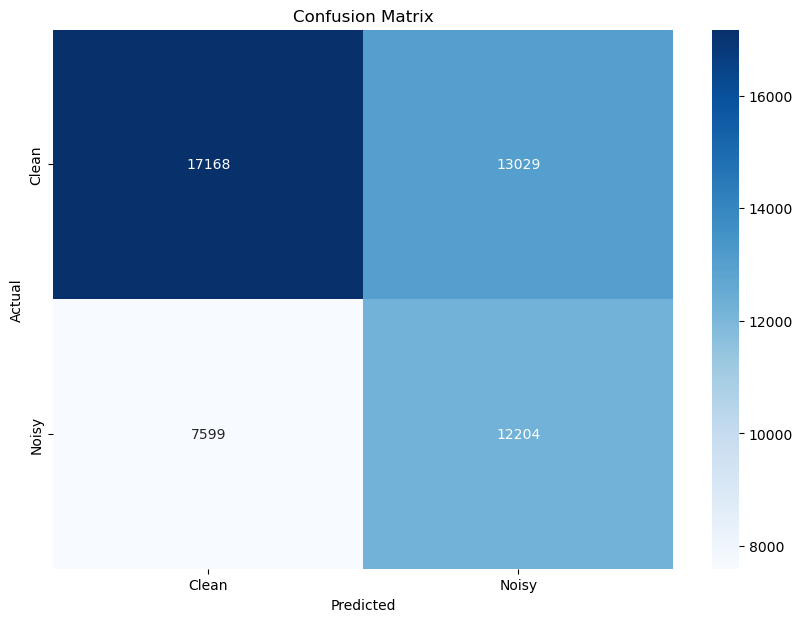

25233 removed from dataset and 2193 relabled
25.99% noise remained in 24767 data


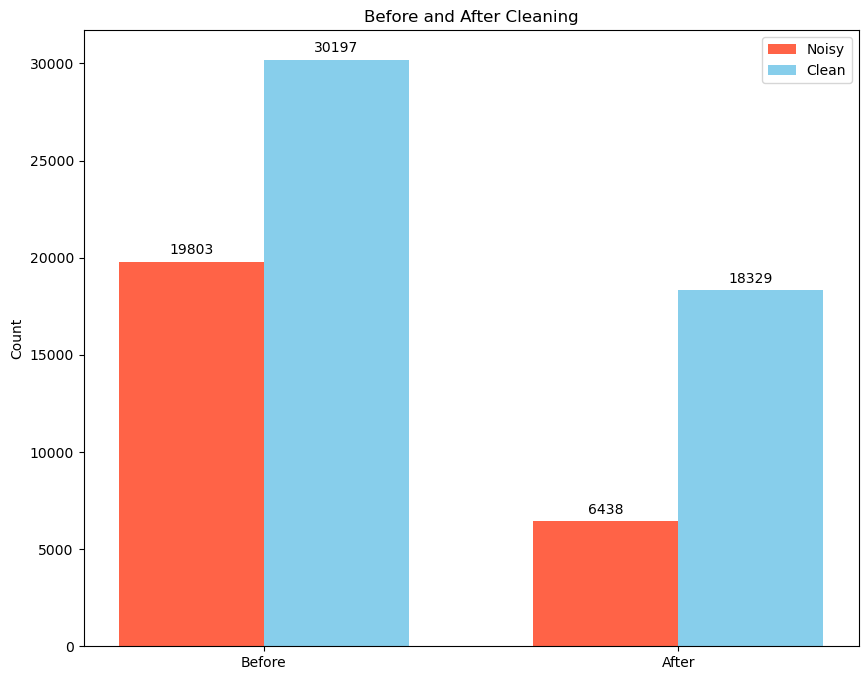

100%|██████████| 24767/24767 [00:00<00:00, 38929.45it/s]

Cleaned dataset saved to cleaned/Advanced-CIFAR10-40.pkl


In [27]:
dataset = CIFAR10(root='data', train=True, download=True)
manual_cleaned = noise_cleaner.advanced_clean(dataset=dataset, mistakes_count=6, relabel_threshold=10)
noise_cleaner.save_cleaned_cifar_dataset_manual(manual_cleaned, 'cleaned', 'Advanced-CIFAR10-40')

## CIFAR 100 - 20

In [6]:
train_dataset = CIFAR100(root='data', train=True, download=True)
transform = transforms.Compose([
                                transforms.ToTensor(),
                                transforms.Normalize(mean=[0.5071, 0.4865, 0.4409], std=[0.2673, 0.2564, 0.2762])])

augmented_transform = transforms.Compose([
    transforms.RandomCrop(size=32, padding=4),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(15),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5071, 0.4865, 0.4409], std=[0.2673, 0.2564, 0.2762])
])

new_augmented_transform = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1), # Optional
    transforms.RandAugment(num_ops=2, magnitude=9),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5071, 0.4865, 0.4409], std=[0.2673, 0.2564, 0.2762])
])

noise_cleaner = NoiseCleaner(train_dataset, noise_type='idn', model_save_path="cifar100(128)(20)/resnet50/model_resnet50_cifar10_fold_{}.pth", 
                             inner_folds_num=15, outer_folds_num=15, model='resnet50', train_noise_level=0.2, epochs_num=1000, train_pairs=300000, 
                             val_pairs=30000, embedding_dimension=128, lr=5e-5, optimizer='Adam', patience=15, transform=transform,
                             weight_decay=5e-4, training_batch_size=2048, pre_trained=True, dropout_prob=0.4, contrastive_ratio=1,
                             distance_meter='euclidian', augmented_transform=new_augmented_transform, trainable=True, pair_validation=False,
                             label_smoothing=0.1, loss='ce', margin=4, freeze_epoch=None, noisy_indices_path='cifar100(128)(20)/resnet50/fold{}_noisy_indices.csv',
                             prediction_path='cifar100(128)(20)/resnet50/fold{}_analysis.csv', mistakes_count=10, relabeling_range=range(8, 15),
                             num_class=100, siamese_middle_size=100)

Files already downloaded and verified
Seed: 73
noise count: 10180 out of 50000 data


In [3]:
noise_cleaner.clean()

Skipping outer fold 1 with results:
43.688037012557835% accuracy in 1513 data
Loaded 1513 noisy indices from cifar100(128)(20)/resnet50/fold1_noisy_indices.csv
Skipping outer fold 2 with results:
42.885245901639344% accuracy in 1525 data
Loaded 1525 noisy indices from cifar100(128)(20)/resnet50/fold2_noisy_indices.csv
Skipping outer fold 3 with results:
45.39473684210527% accuracy in 1520 data
Loaded 1520 noisy indices from cifar100(128)(20)/resnet50/fold3_noisy_indices.csv
Skipping outer fold 4 with results:
45.38866930171278% accuracy in 1518 data
Loaded 1518 noisy indices from cifar100(128)(20)/resnet50/fold4_noisy_indices.csv
Skipping outer fold 5 with results:
44.45955132562883% accuracy in 1471 data
Loaded 1471 noisy indices from cifar100(128)(20)/resnet50/fold5_noisy_indices.csv
Skipping outer fold 6 with results:
45.08361204013378% accuracy in 1495 data
Loaded 1495 noisy indices from cifar100(128)(20)/resnet50/fold6_noisy_indices.csv
Skipping outer fold 7 with results:
44.06887

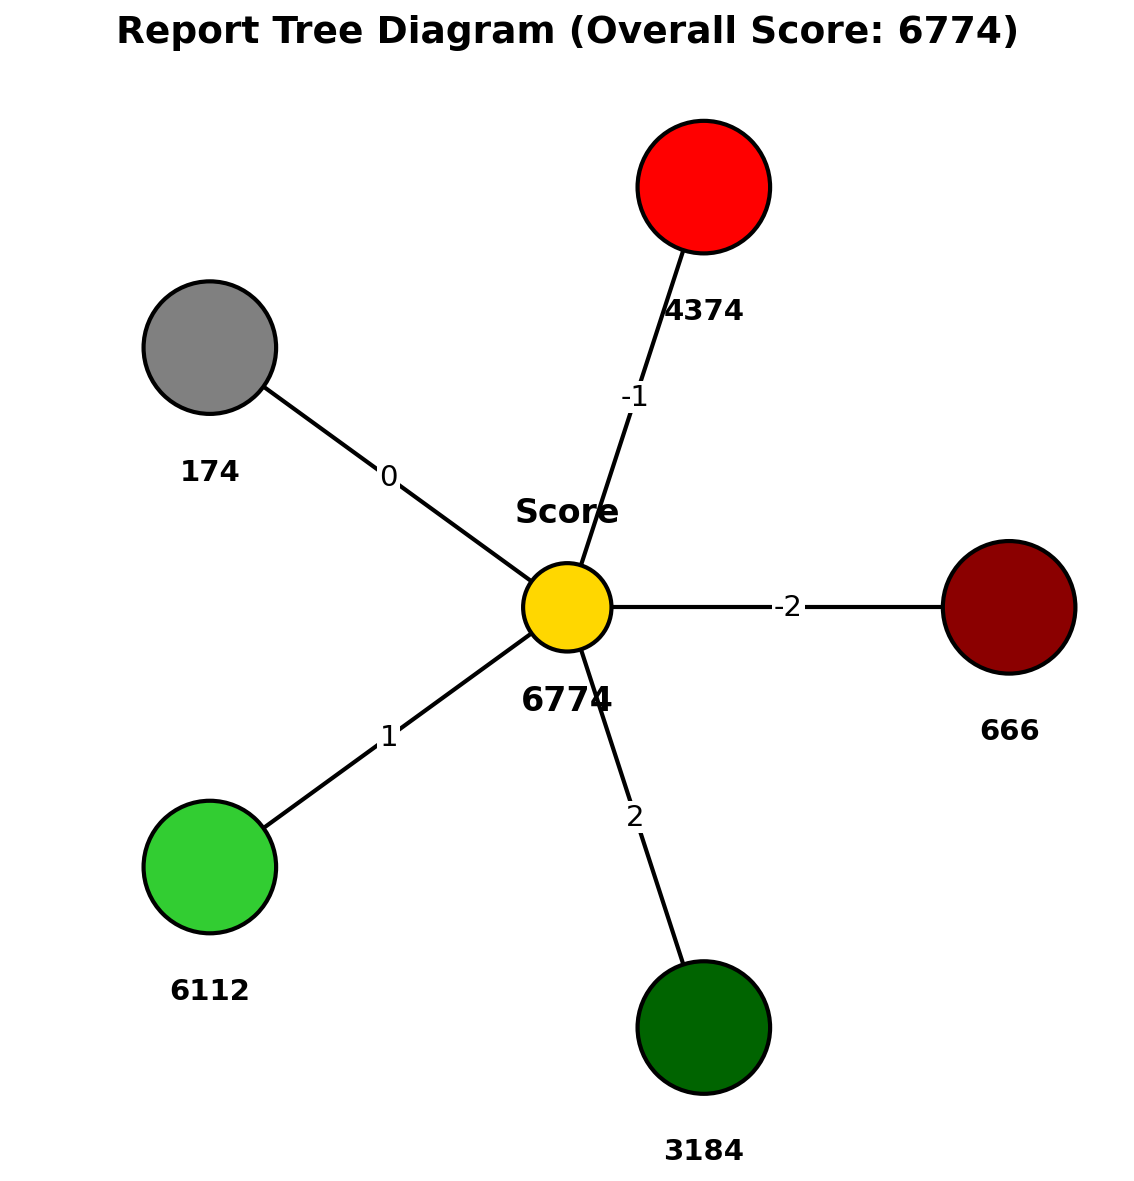

In [11]:
score, relabeling_report = noise_cleaner.calculate_relabeling_score(mistakes_count=15, relabel_threshold=15)

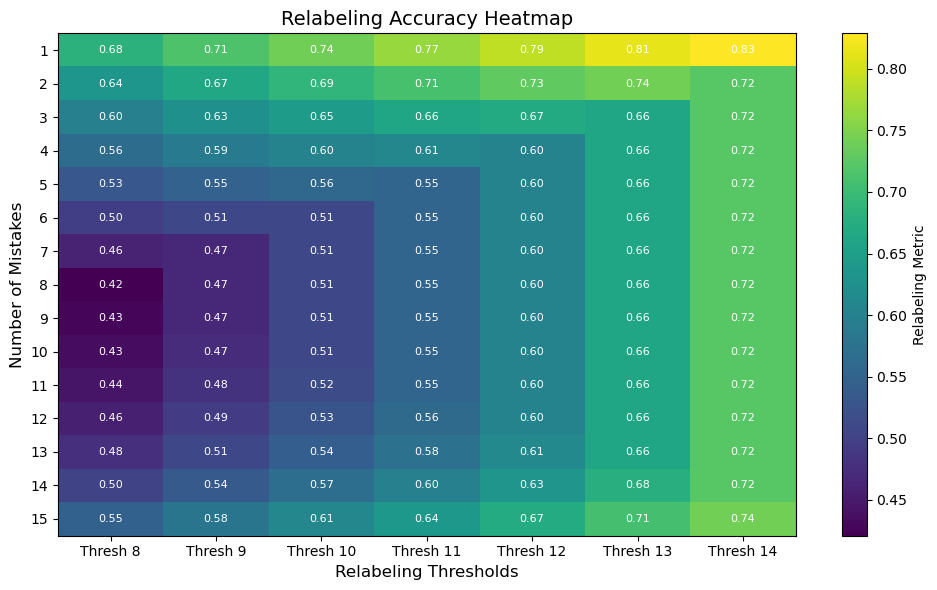

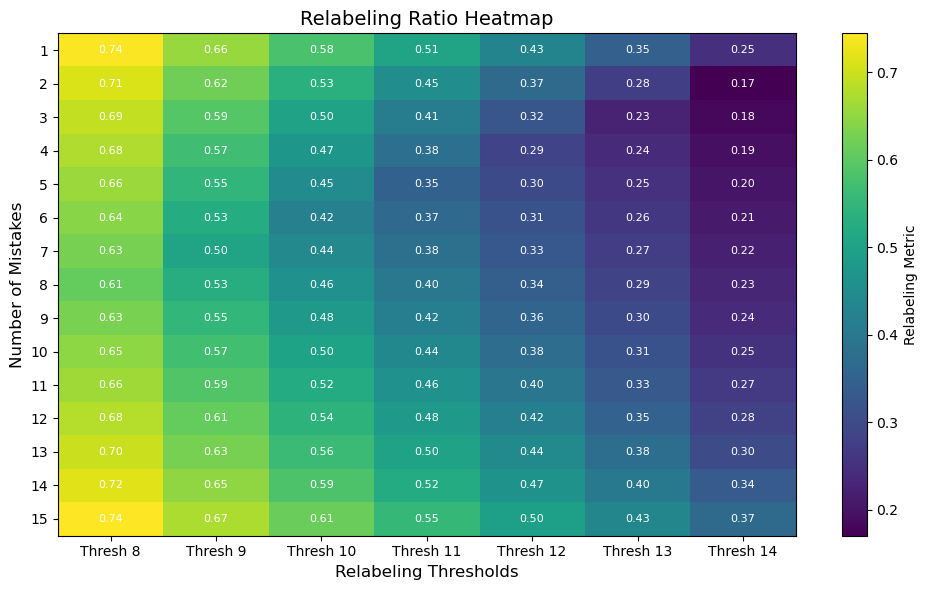

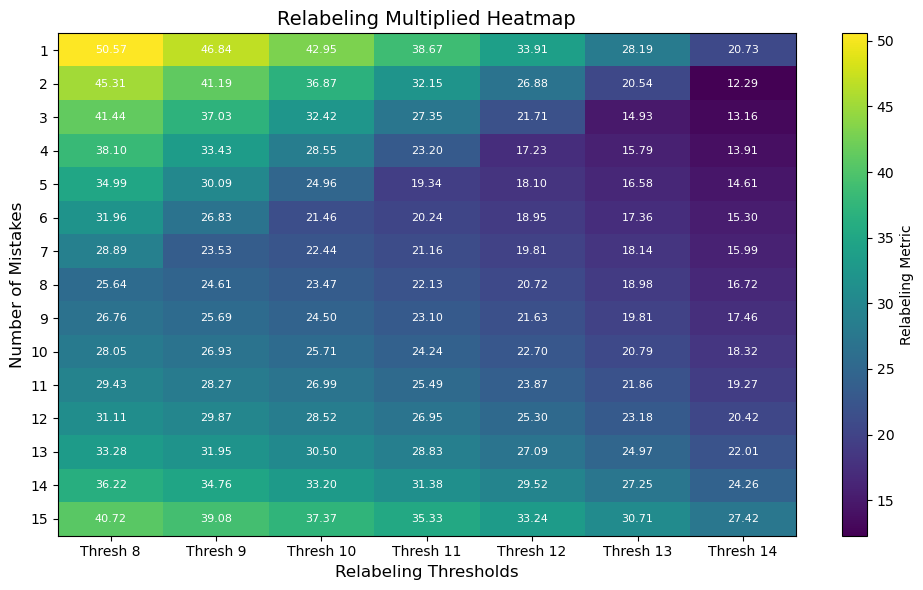

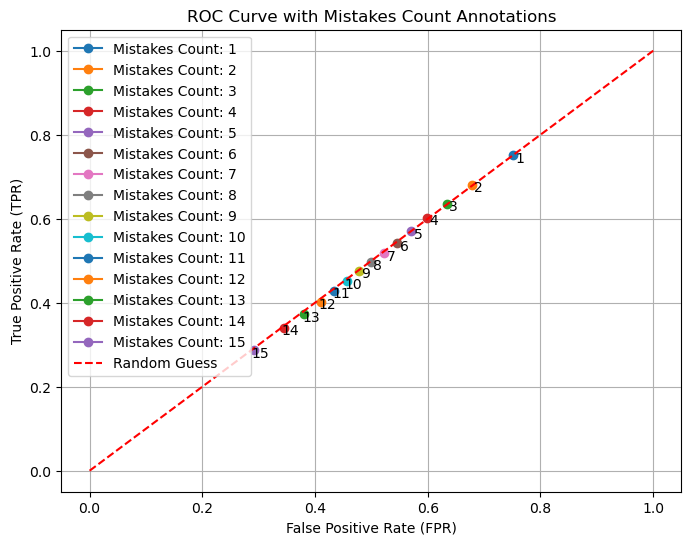

Area Under the Curve (AUC): 0.23858366578878037


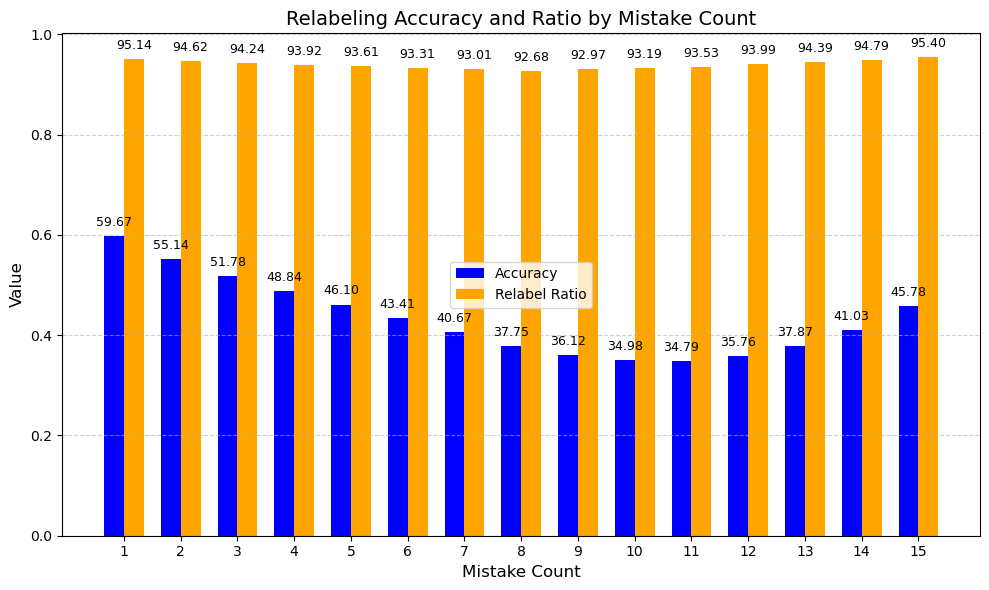

In [7]:
noise_cleaner.analyze()

Files already downloaded and verified
              precision    recall  f1-score   support

       Clean     0.7954    0.7089    0.7497     39820
       Noisy     0.2012    0.2868    0.2365     10180

    accuracy                         0.6230     50000
   macro avg     0.4983    0.4979    0.4931     50000
weighted avg     0.6745    0.6230    0.6452     50000



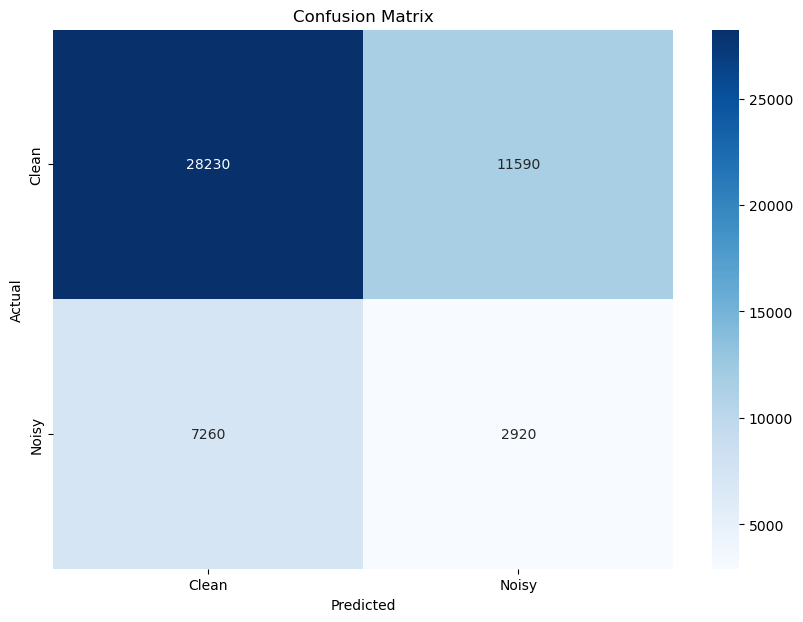

              precision    recall  f1-score   support

       Clean     0.7954    0.7089    0.7497     39820
       Noisy     0.2012    0.2868    0.2365     10180

    accuracy                         0.6230     50000
   macro avg     0.4983    0.4979    0.4931     50000
weighted avg     0.6745    0.6230    0.6452     50000



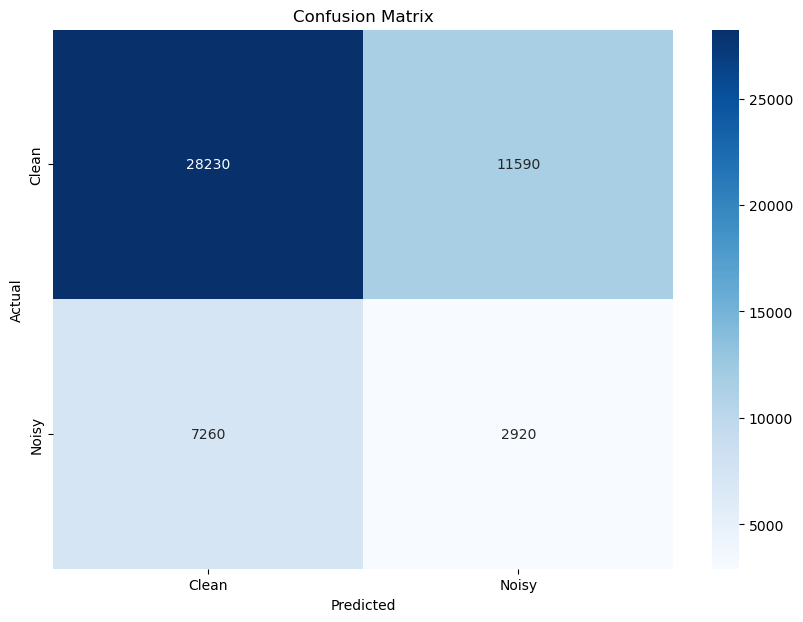

14510 removed from dataset and 0 relabled
20.85% noise remained in 35490 data


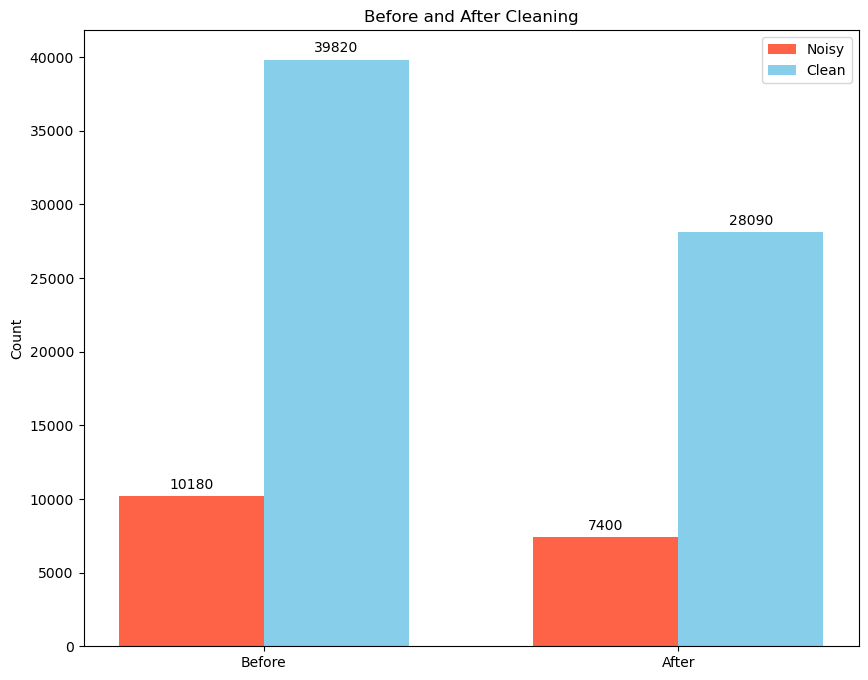

In [10]:
dataset = CIFAR100(root='data', train=True, download=True)
manual_cleaned = noise_cleaner.advanced_clean(dataset=dataset, mistakes_count=15, relabel_threshold=-1)

## CIFAR10N

In [2]:
train_dataset = CIFAR10(root='data', train=True, download=True)

transform = transforms.Compose([
                                transforms.ToTensor(),
                                transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))])

new_augmented_transform = transforms.Compose([
    transforms.RandomRotation(degrees=15),        # Random rotation within 15 degrees
    transforms.RandomHorizontalFlip(p=0.5),      # Random horizontal flip
    transforms.RandomAffine(degrees=0, translate=(0.1, 0.1)), # Width and height shift
    transforms.RandomResizedCrop(size=32, scale=(0.9, 1.0)),  # Zoom-like effect
    transforms.ToTensor(),                        # Convert images to PyTorch tensors
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)) # Normalize
])

noise_cleaner = NoiseCleaner(train_dataset, noise_type='cifar10n', model_save_path="cifar10n/resnet50/model_resnet50_cifar10_fold_{}.pth", 
                             inner_folds_num=10, outer_folds_num=10, model='resnet50', train_noise_level=0.2, epochs_num=1000, train_pairs=200000, 
                             val_pairs=20000, embedding_dimension=64, lr=5e-5, optimizer='Adam', patience=8, transform=transform,
                             weight_decay=5e-4, training_batch_size=2048, pre_trained=True, dropout_prob=0.5, contrastive_ratio=1,
                             distance_meter='euclidian', augmented_transform=new_augmented_transform, trainable=True, pair_validation=False,
                             label_smoothing=0.1, loss='ce', margin=2, freeze_epoch=None, noisy_indices_path='cifar10n/resnet50/fold{}_noisy_indices.csv',
                             prediction_path='cifar10n/resnet50/fold{}_analysis.csv', mistakes_count=10, relabeling_range=range(6, 11))

Files already downloaded and verified
The overall noise rate is 0.09009999999999996
noise count: 4505 out of 50000 data


In [3]:
noise_cleaner.clean()

Skipping outer fold 1 with results:
68.30985915492957% accuracy in 426 data
Loaded 426 noisy indices from cifar10n/resnet50/fold1_noisy_indices.csv
Skipping outer fold 2 with results:
68.16143497757847% accuracy in 446 data
Loaded 446 noisy indices from cifar10n/resnet50/fold2_noisy_indices.csv
Skipping outer fold 3 with results:
71.68141592920354% accuracy in 452 data
Loaded 452 noisy indices from cifar10n/resnet50/fold3_noisy_indices.csv
Skipping outer fold 4 with results:
73.60178970917227% accuracy in 447 data
Loaded 447 noisy indices from cifar10n/resnet50/fold4_noisy_indices.csv
Skipping outer fold 5 with results:
69.39252336448598% accuracy in 428 data
Loaded 428 noisy indices from cifar10n/resnet50/fold5_noisy_indices.csv
Skipping outer fold 6 with results:
73.25581395348837% accuracy in 430 data
Loaded 430 noisy indices from cifar10n/resnet50/fold6_noisy_indices.csv
Skipping outer fold 7 with results:
70.02237136465325% accuracy in 447 data
Loaded 447 noisy indices from cifar1

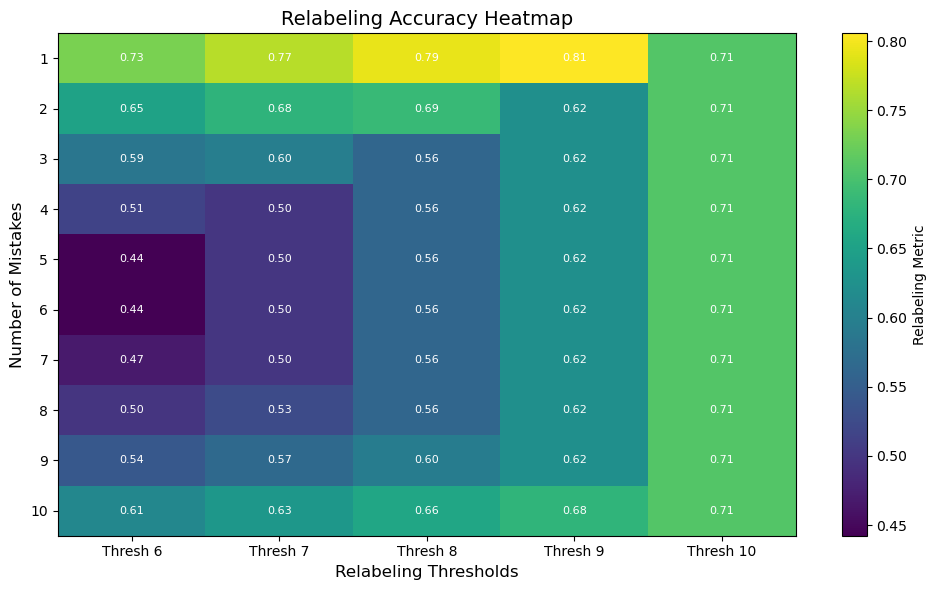

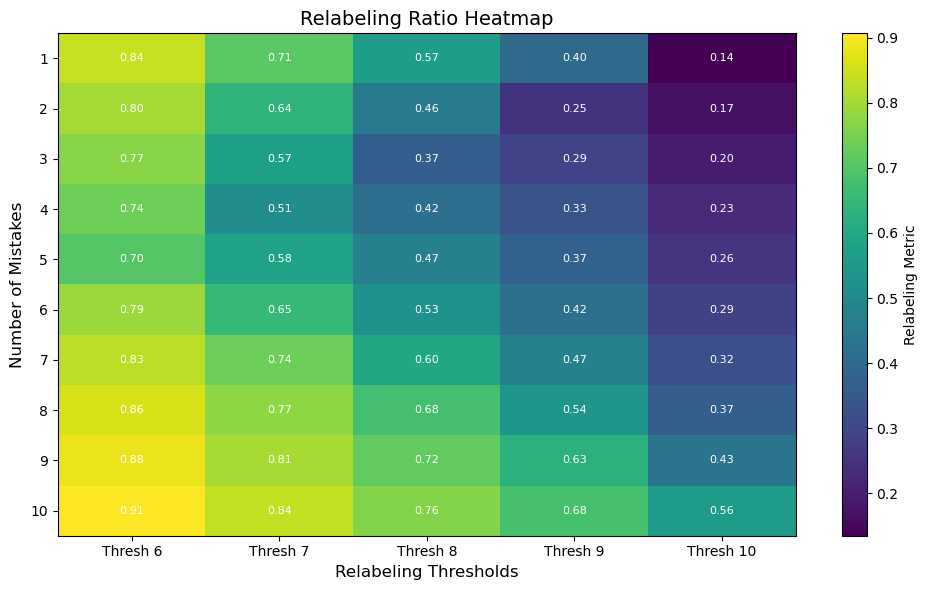

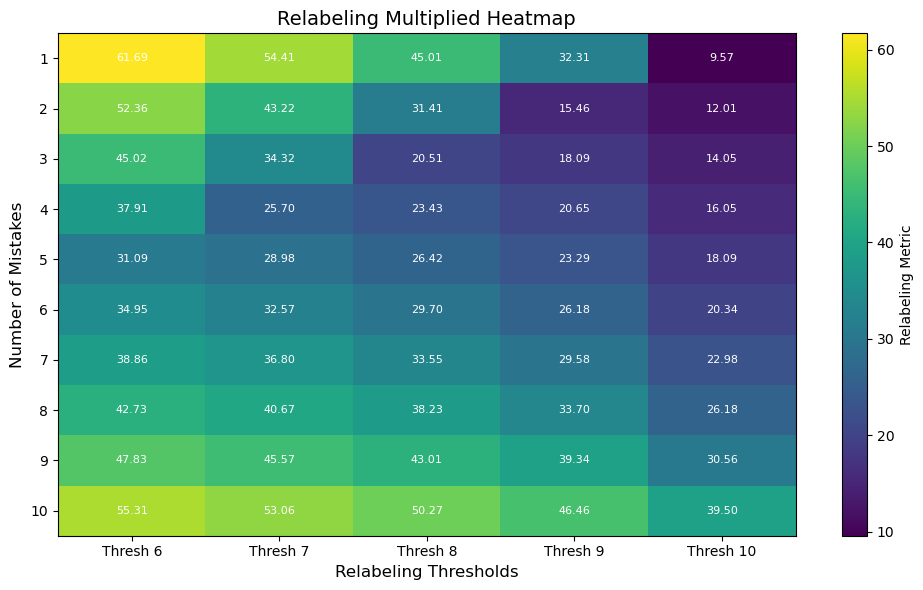

FPR: 0.303681723266293, TPR: 0.9722530521642619, Mistakes Count: 1
FPR: 0.22371689196615013, TPR: 0.9576026637069922, Mistakes Count: 2
FPR: 0.17953621277063414, TPR: 0.9374028856825749, Mistakes Count: 3
FPR: 0.1473348719639521, TPR: 0.9205327413984462, Mistakes Count: 4
FPR: 0.12267282118914166, TPR: 0.8970033296337403, Mistakes Count: 5
FPR: 0.10106605121441917, TPR: 0.879245283018868, Mistakes Count: 6
FPR: 0.08216287504121332, TPR: 0.8519422863485017, Mistakes Count: 7
FPR: 0.06512803604791735, TPR: 0.8182019977802442, Mistakes Count: 8
FPR: 0.04840092317837125, TPR: 0.7758046614872364, Mistakes Count: 9
FPR: 0.029080118694362018, TPR: 0.6847946725860156, Mistakes Count: 10


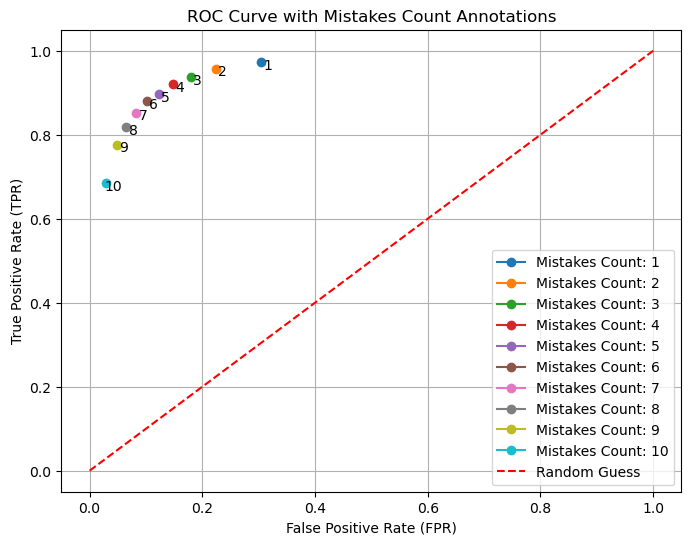

Area Under the Curve (AUC): 0.2485665327226138


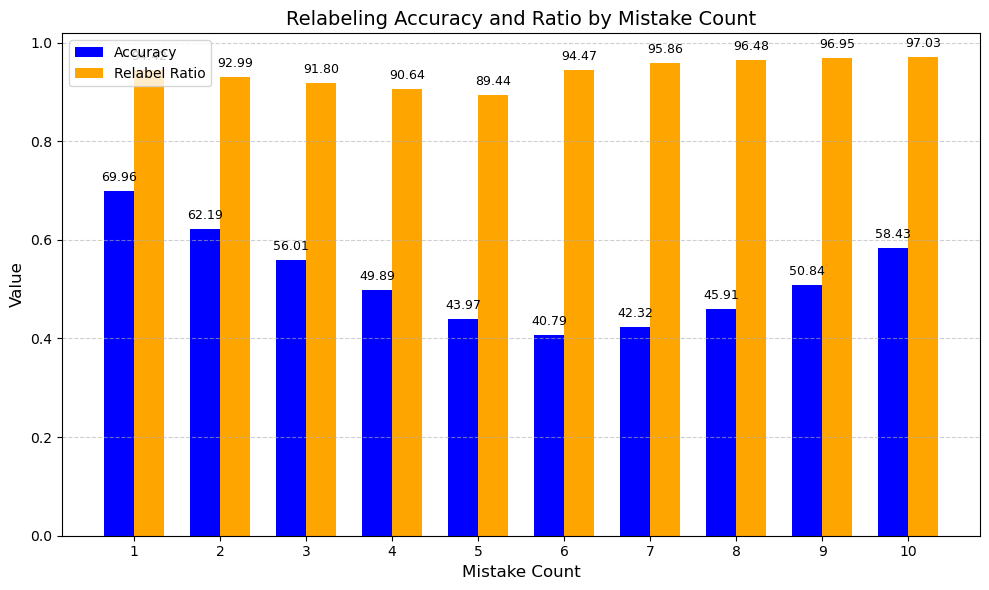

In [3]:
noise_cleaner.analyze()

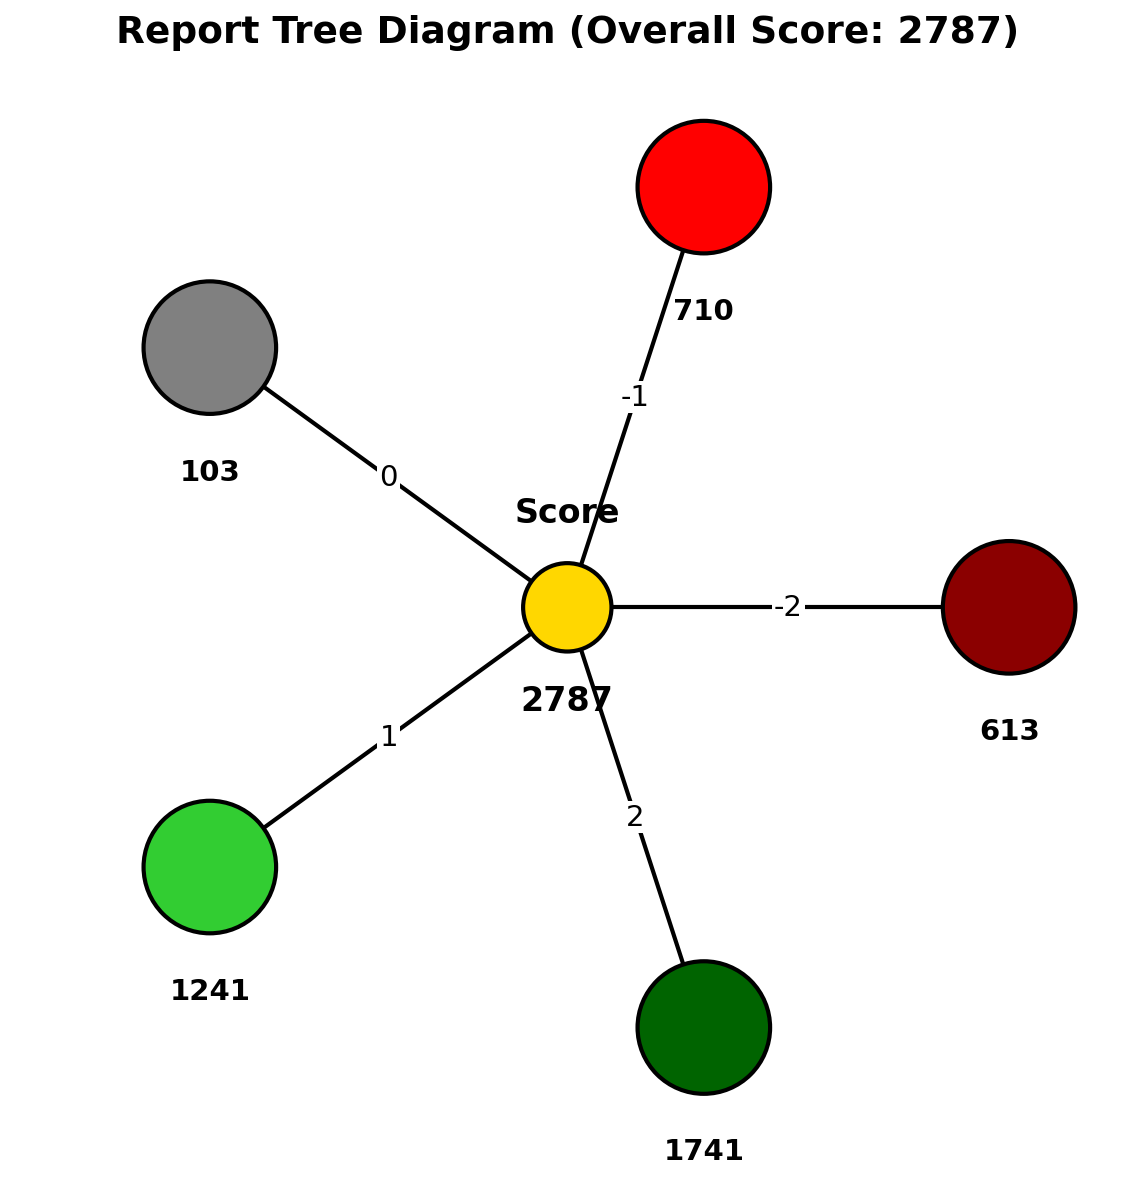

(2787, {'-2': 613, '-1': 710, '0': 103, '1': 1241, '2': 1741})

In [17]:
noise_cleaner.calculate_relabeling_score(mistakes_count=10, relabel_threshold=10)

              precision    recall  f1-score   support

       Clean     0.9689    0.9709    0.9699     45495
       Noisy     0.6999    0.6848    0.6922      4505

    accuracy                         0.9451     50000
   macro avg     0.8344    0.8279    0.8311     50000
weighted avg     0.9446    0.9451    0.9449     50000



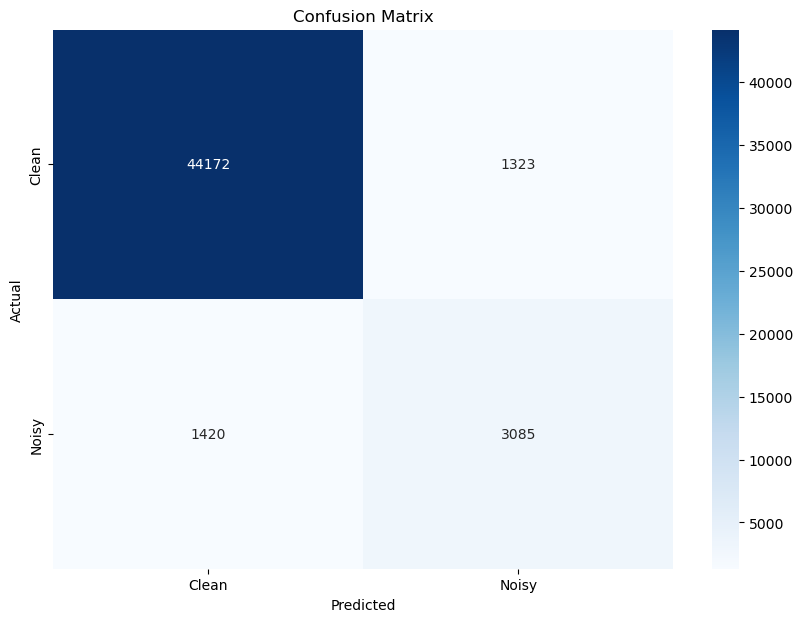

In [14]:
noise_cleaner.report(mistakes_count=10)

Files already downloaded and verified
              precision    recall  f1-score   support

       Clean     0.9772    0.9516    0.9642     45495
       Noisy     0.6135    0.7758    0.6852      4505

    accuracy                         0.9358     50000
   macro avg     0.7953    0.8637    0.8247     50000
weighted avg     0.9444    0.9358    0.9391     50000



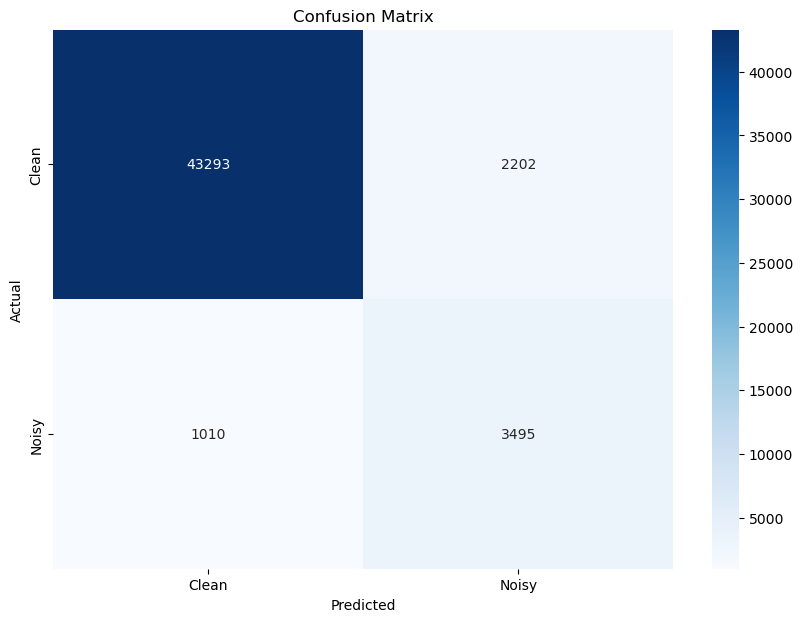

              precision    recall  f1-score   support

       Clean     0.9390    0.9651    0.9518     45495
       Noisy     0.5096    0.3665    0.4263      4505

    accuracy                         0.9111     50000
   macro avg     0.7243    0.6658    0.6891     50000
weighted avg     0.9003    0.9111    0.9045     50000



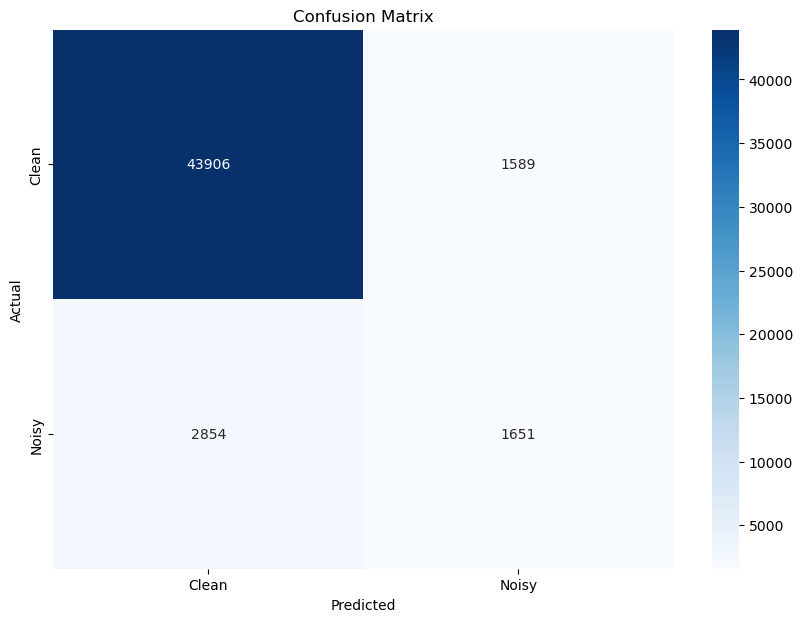

3240 removed from dataset and 2457 relabled
3.69% noise remained in 46760 data


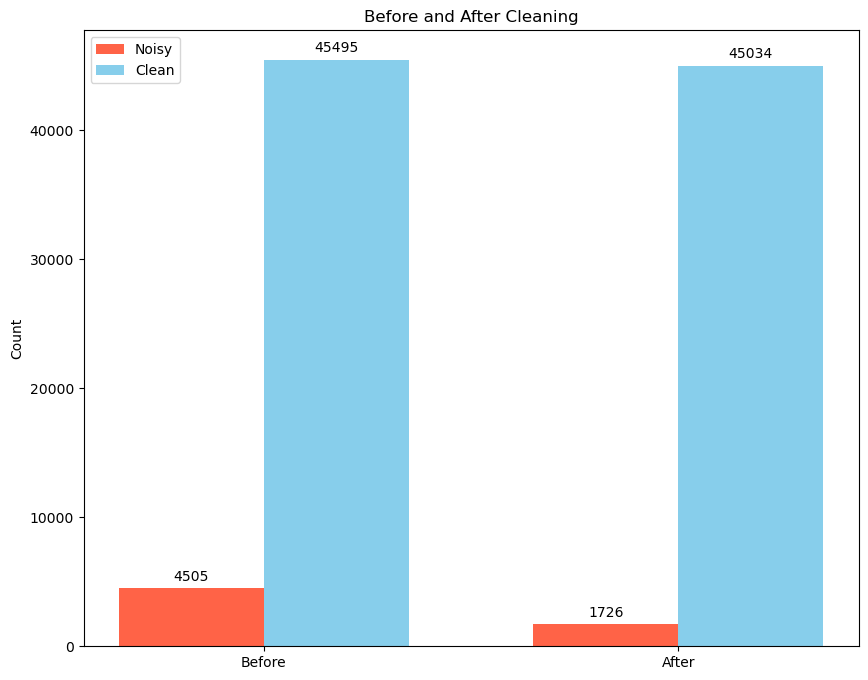

100%|██████████| 46760/46760 [00:01<00:00, 37861.09it/s]

Cleaned dataset saved to cleaned/Advanced-CIFAR10N.pkl


In [18]:
dataset = CIFAR10(root='data', train=True, download=True)
manual_cleaned = noise_cleaner.advanced_clean(dataset=dataset, mistakes_count=9, relabel_threshold=10)
noise_cleaner.save_cleaned_cifar_dataset_manual(manual_cleaned, 'cleaned', 'Advanced-CIFAR10N')

Files already downloaded and verified


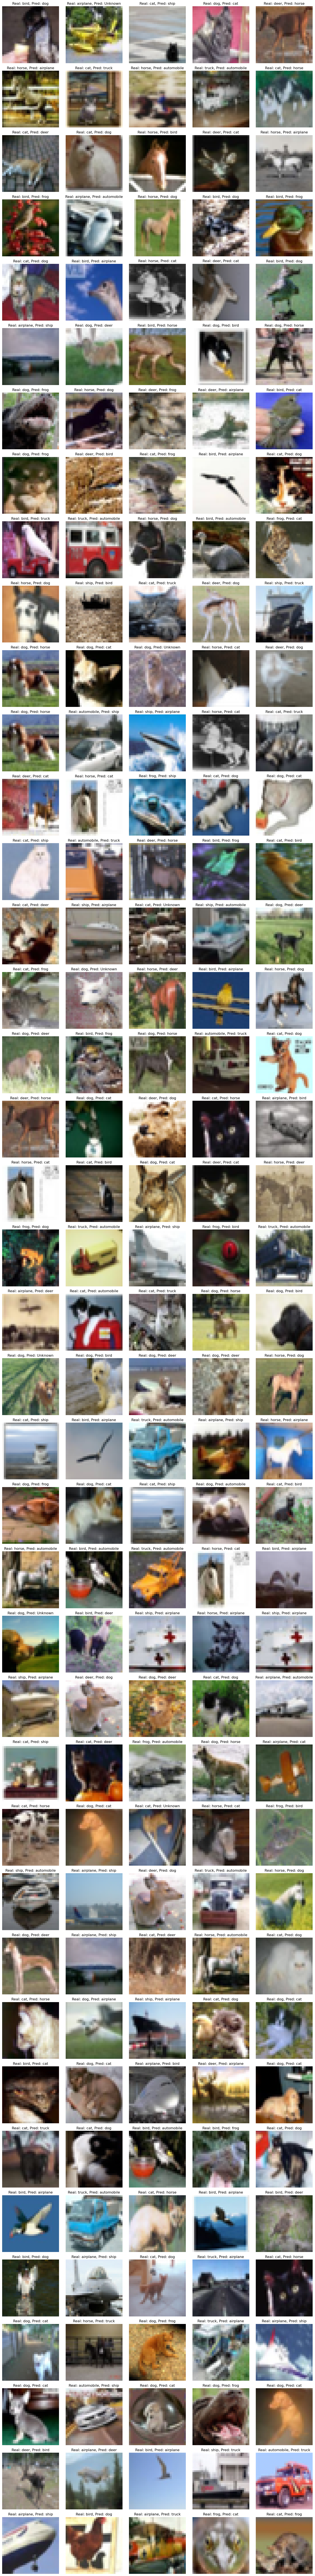

In [4]:
dataset = CIFAR10(root='data', train=True, download=True)
noise_cleaner.plot_false_positives(dataset=dataset, mistakes_count=10, count=200, labels=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck'])